# Librerías necesarias

In [1]:
import pandas as pd 
import statistics as stats 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
import io
from google.colab import files

# Carga de datos

Lectura de ficheros

In [2]:
Players = pd.read_excel('TFM.xlsx', sheet_name='Jugadores')
Stats = pd.read_excel('TFM.xlsx', sheet_name='Stats')

# Preparación de los datos: Players

In [3]:
Players.head()

,Jugador,Año_Comienzo,Año_Final,Altura,Peso,Universidad,Año_Nacimiento
0,Alaa Abdelnaby,1991,1995,6-10,240.0,Duke University,1968.0
1,Zaid Abdul-Aziz,1969,1978,6-9,235.0,Iowa State University,1946.0
2,Kareem Abdul-Jabbar,1970,1989,7-2,225.0,"University of California, Los Angeles",1947.0
3,Mahmoud Abdul-Rauf,1991,2001,6-1,162.0,Louisiana State University,1969.0
4,Tariq Abdul-Wahad,1998,2003,6-6,223.0,San Jose State University,1974.0


In [4]:
#Dimensión del conjunto de datos
Players.shape

(4548, 7)

In [5]:
#Tipo de cada variable
Players.dtypes 

Jugador            object
Año_Comienzo        int64
Año_Final           int64
Altura             object
Peso              float64
Universidad        object
Año_Nacimiento    float64
dtype: object

In [6]:
#Cambiamos el tipo de las variables peso y año de nacimiento
Players['Peso'] = Players['Peso'].astype('Int64') 
Players['Año_Nacimiento'] = Players['Año_Nacimiento'].astype('Int64')

In [7]:
#Todos los datos enteros
Players.dtypes

Jugador           object
Año_Comienzo       int64
Año_Final          int64
Altura            object
Peso               Int64
Universidad       object
Año_Nacimiento     Int64
dtype: object

In [8]:
#Valores nulos
Players.isnull().sum()

Jugador             0
Año_Comienzo        0
Año_Final           0
Altura              0
Peso                6
Universidad       302
Año_Nacimiento     31
dtype: int64

In [9]:
#Creamos dataframe con los datos numéricos 
PlayersNums = Players.iloc[:,[1,2,4,6]]

In [10]:
#Eliminamos los valores nulos para obtener las medias reales 
PlayersNums_sin_nan = PlayersNums.dropna(how='any') 
PesoMedio=stats.mean(PlayersNums_sin_nan.Peso)

In [11]:
#Rellenamos nulos con cero 
PlayersNums.fillna(0, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


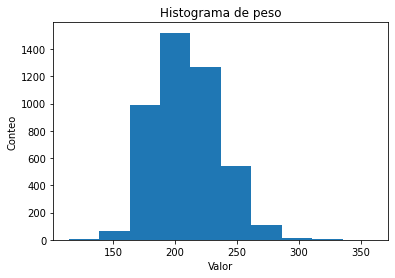

In [12]:
#Ahora observamos la distribución de ambas variables, para ver como imputar los valores nulos 
#Distribucion del peso 
plt.hist(PlayersNums_sin_nan.Peso) 
plt.title('Histograma de peso') 
plt.xlabel('Valor') 
plt.ylabel('Conteo') 
plt.show() 
#Mas de 2000 registros se encuentran en torno a las 200 libras, 
#siendo el valor de la media 208, es correcto imputar la media a los valores nulos

In [13]:
#Creamos una variable llamada edad, donde se resta el año de inicio menos el de nacimiento 
edad = np.zeros(len(PlayersNums_sin_nan))

for i in range(0,len(PlayersNums_sin_nan)): 
  edad[i]=round((PlayersNums_sin_nan.iloc[i,0]-PlayersNums_sin_nan.iloc[i,3]),0)

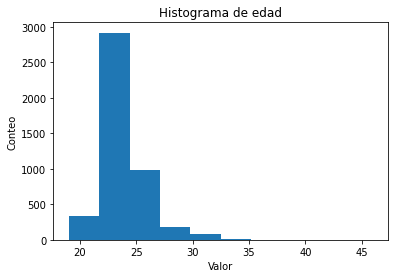

In [14]:
#Distribucion de la edad 
plt.hist(edad) 
plt.title('Histograma de edad') 
plt.xlabel('Valor') 
plt.ylabel('Conteo') 
plt.show() 
#Mas de 3500 registros se encuentran entre 20 y 25, mientras que la media 
#es de 24 por lo que un valor medio de resta al año de inicio de 24 es el correcto 
EdadMedia=round(stats.mean(edad),0)

In [15]:
#Imputamos la media a los nulos del Peso 
for i in range(0,len(Players)): 
  if PlayersNums.iloc[i,2]==0: 
    PlayersNums.iloc[i,2]=PesoMedio 
  else: 
    PlayersNums.iloc[i,2]=PlayersNums.iloc[i,2] 
#Comprobamos que el valor minimo ya no es 0, es 114 
min(PlayersNums.Peso)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


114

In [16]:
#Imputamos el año de comienzo - 25 a los nulos del Año nacimiento 
for i in range(0,len(Players)): 
  if PlayersNums.iloc[i,3]==0: 
    PlayersNums.iloc[i,3]=PlayersNums.iloc[i,0]-24 
  else: 
    PlayersNums.iloc[i,3]=PlayersNums.iloc[i,3] 
#Comprobamos que el valor minimo ya no es 0, es 1902 
min(PlayersNums.Año_Nacimiento)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


1902

In [17]:
#Sustituimos las columnas en el conjunto de datos original 
Players.Peso = PlayersNums.Peso 
Players.Año_Nacimiento = PlayersNums.Año_Nacimiento

#Comprobamos valores minimos, ahora son correctos 
min(Players.Peso) 
min(Players.Año_Nacimiento)

1902

In [18]:
#Separamos la columna Altura mediante el delimitador, y se añade al conjunto de datos 
Altura = Players["Altura"].str.split('-', expand=True) 
Altura.columns = ['Pies', 'Pulgadas'] 
Players = pd.concat([Players, Altura], axis=1)

In [19]:
#Convertimos las variable Peso y Altura

#La primera de libras a kilos, 1 libra es igual a 0.453592 kilos 
conversorlibras=0.453592 
for i in range(0,len(Players)): 
  Players.iloc[i,4]=round(Players.iloc[i,4]*conversorlibras,0)

#Ahora el peso minimo no es 114 lb, son 52 kg 
min(Players.Peso)

52

In [20]:
#La segunda de pies y pulgadas a cm, 1 pie igual a 30,48 cm y 1 pulgada 2,54 
#El primer paso es pasar las variables a float 
Players['Pies'] = Players['Pies'].astype('float64') 
Players['Pulgadas'] = Players['Pulgadas'].astype('float64')

conversorpies=30.48 
conversorpulgadas=2.54 
for i in range(0,len(Players)): 
  Players.iloc[i,7]=round(Players.iloc[i,7]*conversorpies,2) 
  Players.iloc[i,8]=round(Players.iloc[i,8]*conversorpulgadas,2)

#Sumamos ambas variables 
for i in range(0,len(Players)): 
  Players.iloc[i,3]=round(Players.iloc[i,7]+Players.iloc[i,8],0)

#Ahora el peso minimo no es 5 pies y 3 pulgadas, son 160 cm 
min(Players.Altura)

160.0

In [21]:
#Cambiamos el tipo a entero de nuevo 
Players['Peso'] = Players['Peso'].astype('Int64') 
Players['Altura'] = Players['Altura'].astype('Int64')

#Eliminamos las variables pies y pulgadas, ya no aportan información 
Players = Players.drop(['Pies','Pulgadas'], axis=1)

In [22]:
#Contamos por número de jugador 
Players['Jugador'].value_counts() 

Charles Jones      3
Charles Smith      3
George Johnson     3
Bill Bradley       2
Sam Williams       2
                  ..
Dion Glover        1
Paul Zipser        1
Carl Nicks         1
David Stockton     1
Oscar Robertson    1
Name: Jugador, Length: 4499, dtype: int64

In [23]:

#Existen aproximadamente unos 50 nombres que corresponden a más de un jugador 
lista=[] 
for i in range(0,len(Players)): 
  if Players.iloc[i,0] not in lista: 
    lista.append(Players.iloc[i,0]) 
  else: 
    Players.iloc[i,0]=Players.iloc[i,0]+'1' 
    if Players.iloc[i,0] not in lista: 
      lista.append(Players.iloc[i,0]) 
    else: 
      Players.iloc[i,0]=Players.iloc[i,0]+'2'

#Comprobamos que el problema se ha solucionado 
Players['Jugador'].value_counts()



Ruben Nembhard         1
Jamario Moon           1
Darren Tillis          1
Bob Lanier             1
Don Otten              1
                      ..
Rick Fox               1
Arvydas Macijauskas    1
Noel Felix             1
Fred VanVleet          1
Herschell Turner       1
Name: Jugador, Length: 4548, dtype: int64

In [24]:
#Observamos los tipo de las variables, son todos correctos 
Players.dtypes


Jugador           object
Año_Comienzo       int64
Año_Final          int64
Altura             Int64
Peso               Int64
Universidad       object
Año_Nacimiento     Int64
dtype: object

In [25]:
#Observamos algunos parámetros del conjunto de datos final con el que vamos a trabajar 
Players.describe()

,Año_Comienzo,Año_Final,Altura,Peso,Año_Nacimiento
count,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000
mean,1985.078496,1989.270888,198.144679,94.759675,1961.145998
std,20.978489,21.879070,9.311542,11.927668,21.672113
min,1947.000000,1947.000000,160.000000,52.000000,1902.000000
25%,1969.000000,1973.000000,190.000000,86.000000,1946.000000
50%,1986.000000,1992.000000,198.000000,95.000000,1963.000000
75%,2003.000000,2009.000000,206.000000,102.000000,1980.000000
max,2018.000000,2018.000000,231.000000,163.000000,1998.000000


# Preparación de los datos: Stats

In [26]:
Stats.head()

,Clave,Año,Jugador,Posición,Edad,Equipo,Partidos,Partidos_Titular,Minutos,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,NaN,0.467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.1,3.6,3.5,NaN,NaN,NaN,NaN,NaN,144.0,516.0,0.279,NaN,NaN,NaN,144.0,516.0,0.279,0.279,170.0,241.0,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,NaN,0.387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.6,0.6,2.2,NaN,NaN,NaN,NaN,NaN,102.0,274.0,0.372,NaN,NaN,NaN,102.0,274.0,0.372,0.372,75.0,106.0,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,NaN,0.259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9,2.8,3.6,NaN,NaN,NaN,NaN,NaN,174.0,499.0,0.349,NaN,NaN,NaN,174.0,499.0,0.349,0.349,90.0,129.0,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,NaN,0.395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5,-0.1,-0.6,NaN,NaN,NaN,NaN,NaN,22.0,86.0,0.256,NaN,NaN,NaN,22.0,86.0,0.256,0.256,19.0,34.0,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,NaN,0.378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5,-0.1,-0.6,NaN,NaN,NaN,NaN,NaN,21.0,82.0,0.256,NaN,NaN,NaN,21.0,82.0,0.256,0.256,17.0,31.0,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [27]:
 #Se disponen de 24691 registros y 51 variables en el fichero de estadísticas 
 Stats.shape

(24691, 51)

In [28]:
#Comprobamos el tipo de cada variable 
Stats.dtypes

Clave                 int64
Año                 float64
Jugador              object
Posición             object
Edad                float64
Equipo               object
Partidos            float64
Partidos_Titular    float64
Minutos             float64
PER                 float64
TS%                 float64
3PAr                float64
FTr                 float64
ORB%                float64
DRB%                float64
TRB%                float64
AST%                float64
STL%                float64
BLK%                float64
TOV%                float64
USG%                float64
OWS                 float64
DWS                 float64
WS                  float64
WS/48               float64
OBPM                float64
DBPM                float64
BPM                 float64
VORP                float64
FG                  float64
FGA                 float64
FG%                 float64
3P                  float64
3PA                 float64
3P%                 float64
2P                  

In [29]:
#Comprobamos los valores nulos 
Stats.isnull().sum()

Clave                  0
Año                   67
Jugador               67
Posición              67
Edad                  75
Equipo                67
Partidos              67
Partidos_Titular    6458
Minutos              553
PER                  590
TS%                  153
3PAr                5852
FTr                  166
ORB%                3899
DRB%                3899
TRB%                3120
AST%                2136
STL%                3899
BLK%                3899
TOV%                5109
USG%                5051
OWS                  106
DWS                  106
WS                   106
WS/48                590
OBPM                3894
DBPM                3894
BPM                 3894
VORP                3894
FG                    67
FGA                   67
FG%                  166
3P                  5764
3PA                 5764
3P%                 9275
2P                    67
2PA                   67
2P%                  195
eFG%                 166
FT                    67


In [30]:
#Se eliminan las filas que tienen valor nulo en jugador 
Stats = Stats.dropna(subset=["Jugador"])

In [31]:
#Se eliminan las siguientes variables al no aportar información 
Stats = Stats.drop(['3PAr','FTr','ORB%','DRB%','TRB%', 'AST%','STL%','BLK%','TOV%','USG%', 
                    'OWS','DWS','WS','WS/48','OBPM', 'DBPM','BPM','VORP'], axis=1)

In [32]:
#La mayoria de los nulos que aparecen corresponden a datos anteriores a 1980, #ya que existian menores facilidades para las recogidas de los datos, por lo que 
#se va a filtrar a partir del año 1980 
Stats = Stats[Stats.Año > 1979]

In [33]:
#Comprobamos los valores nulos de nuevo 
Stats.isnull().sum() 
#Existen valores nulos en las variables de porcentaje cuando el numero de 
#lanzamientos es cero por lo que hay que convertir esos nulos en cero

Clave                  0
Año                    0
Jugador                0
Posición               0
Edad                   0
Equipo                 0
Partidos               0
Partidos_Titular     694
Minutos                0
PER                    5
TS%                   76
FG                     0
FGA                    0
FG%                   88
3P                     0
3PA                    0
3P%                 3511
2P                     0
2PA                    0
2P%                  117
eFG%                  88
FT                     0
FTA                    0
FT%                  745
ORB                    0
DRB                    0
TRB                    0
AST                    0
STL                    0
BLK                    0
TOV                    0
PF                     0
PTS                    0
dtype: int64

In [34]:
#Se disponen de 18927 registros y 33 variables tras la reduccion de variables 
Stats.shape

(18927, 33)

### Datos del jugador

In [35]:
Datos = Stats.iloc[:,0:10]

In [36]:
#Comprobamos el tipo de cada variable 
Datos.dtypes 
#Debemos convertir todas las variables numéricas a enteras a excepcion del PER 
Datos['Año'] = Datos['Año'].astype('Int64') 
Datos['Edad'] = Datos['Edad'].astype('Int64') 
Datos['Partidos'] = Datos['Partidos'].astype('Int64') 
Datos['Partidos_Titular'] = Datos['Partidos_Titular'].astype('Int64') 
Datos['Minutos'] = Datos['Minutos'].astype('Int64')

In [37]:
#Comprobamos los valores nulos 
Datos.isnull().sum()

Clave                 0
Año                   0
Jugador               0
Posición              0
Edad                  0
Equipo                0
Partidos              0
Partidos_Titular    694
Minutos               0
PER                   5
dtype: int64

In [38]:
#Eliminamos la variable Partidos_Titular al contar con una gran cantidad de nulos 
Datos = Datos.drop(['Partidos_Titular'], axis=1)

In [39]:
#Las variable PER al representar un porcentaje pequeño #Eliminamos los valores nulos para obtener las medias reales 
Datos_sin_nan = Datos.dropna(how='any') 
PerMedio=stats.mean(Datos_sin_nan.PER)

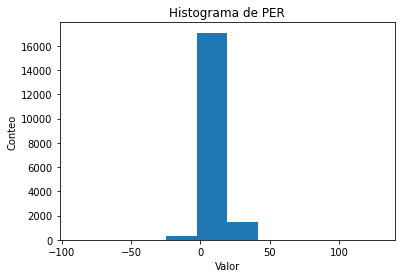

In [40]:
#Distribucion del PER 
plt.hist(Datos_sin_nan.PER) 
plt.title('Histograma de PER') 
plt.xlabel('Valor') 
plt.ylabel('Conteo') 
plt.show() 
#Cerca de 16000 registros entre 0-15, mientras que la media es 
#de 12.39, por lo que es correcto imputarla

In [41]:
#Rellenamos nulos con -100, ya que existen jugador con valores 0 en minutos y PER 
Datos.fillna(-100, inplace=True)

#PER: Player Eficiency Raring 
for i in range(0,len(Datos)): 
  if Datos.iloc[i,8]==-100: 
    Datos.iloc[i,8]=round(PerMedio,1) 
  else: 
    Datos.iloc[i,8]=Datos.iloc[i,8] 
#Valor mínimo 
min(Datos.PER)

-90.6

In [42]:
#Separamos la variable posicion por el delimitador 
Posición = Datos["Posición"].str.split('-', expand=True) 
Posición.columns = ['Pos', 'Pos2'] 
Datos = pd.concat([Datos, Posición], axis=1)

In [43]:
#Eliminamos la variable Posicion original, porque ya no es necesaria 
Datos = Datos.drop(['Posición'], axis=1)

In [44]:
Datos.head()

,Clave,Año,Jugador,Edad,Equipo,Partidos,Minutos,PER,Pos,Pos2
5727,5727,1980,Kareem Abdul-Jabbar,32,LAL,82,3143,25.3,C,None
5728,5728,1980,Tom Abernethy,25,GSW,67,1222,11.0,PF,None
5729,5729,1980,Alvan Adams,25,PHO,75,2168,19.2,C,None
5730,5730,1980,Tiny Archibald,31,BOS,80,2864,15.3,PG,None
5731,5731,1980,Dennis Awtrey,31,CHI,26,560,7.4,C,None


In [45]:
#Ahora se une este dataframe con Players que también disponian de datos del jugador 
Final = pd.merge(Players, Datos, on='Jugador')

In [46]:
#Comprobamos el tipo de cada variable, son correctos 
Final.dtypes

Jugador            object
Año_Comienzo        int64
Año_Final           int64
Altura              Int64
Peso                Int64
Universidad        object
Año_Nacimiento      Int64
Clave               int64
Año                 Int64
Edad                Int64
Equipo             object
Partidos            Int64
Minutos             Int64
PER               float64
Pos                object
Pos2               object
dtype: object

In [47]:
#Comprobamos los valores nulos, solo nulos en Universidad y posicion_sec, es correcto 
Final.isnull().sum() 
#La unión se ha realizado correctamente

Jugador               0
Año_Comienzo          0
Año_Final             0
Altura                0
Peso                  0
Universidad        1613
Año_Nacimiento        0
Clave                 0
Año                   0
Edad                  0
Equipo                0
Partidos              0
Minutos               0
PER                   0
Pos                   0
Pos2              18064
dtype: int64

In [48]:
#Renombramos los datos de las posiciones principal y secundaria

#Primero observamos el conteo por posicion 
Final['Pos'].value_counts() 
Final['Pos2'].value_counts() 
#Base -> PG o G #Escolta -> SG #Alero -> SF o F #Ala-Pivot -> PF #Pivot -> C

#Posicion principal 
for i in range(0,len(Final)): 
  if Final.iloc[i,14]=='PG' or Final.iloc[i,14]=='G': 
    Final.iloc[i,14]='Base' 
  elif Final.iloc[i,14]=='SG': 
    Final.iloc[i,14]='Escolta' 
  elif Final.iloc[i,14]=='SF' or Final.iloc[i,14]=='F': 
    Final.iloc[i,14]='Alero' 
  elif Final.iloc[i,14]=='PF': 
    Final.iloc[i,14]='Ala-Pivot'
  else: 
    Final.iloc[i,14]='Pivot'

#Posicion secundaria 
for i in range(0,len(Final)): 
  if Final.iloc[i,15]=='PG' or Final.iloc[i,15]=='G': 
    Final.iloc[i,15]='Base' 
  elif Final.iloc[i,15]=='SG': 
    Final.iloc[i,15]='Escolta' 
  elif Final.iloc[i,15]=='SF' or Final.iloc[i,15]=='F': 
    Final.iloc[i,15]='Alero' 
  elif Final.iloc[i,15]=='PF': 
    Final.iloc[i,15]='Ala-Pivot'
  elif Final.iloc[i,15]=='C': 
    Final.iloc[i,15]='Pivot'
  else: 
    Final.iloc[i,15]=Final.iloc[i,15]

In [49]:
#Comprobamos los nuevos valores 
Final['Pos'].value_counts() 
Final['Pos2'].value_counts()

Escolta      54
Alero        48
Ala-Pivot    47
Base         24
Pivot        23
Name: Pos2, dtype: int64

###Tiros del jugador

In [50]:
Tiros = Stats.iloc[:,10:24]
Tiros = pd.concat([Tiros, Stats.PTS], axis=1)

In [51]:
#Comprobamos el tipo de cada variable
Tiros.dtypes

TS%     float64
FG      float64
FGA     float64
FG%     float64
3P      float64
3PA     float64
3P%     float64
2P      float64
2PA     float64
2P%     float64
eFG%    float64
FT      float64
FTA     float64
FT%     float64
PTS     float64
dtype: object

In [52]:
#Convertimos las variables a enteras, a excepcion de los porcentajes
Tiros['FG'] = Tiros['FG'].astype('Int64') #Tiros de campo convertidos
Tiros['FGA'] = Tiros['FGA'].astype('Int64') #Tiros de campo intentados
Tiros['3P'] = Tiros['3P'].astype('Int64') #Tiros de tres convertidos
Tiros['3PA'] = Tiros['3PA'].astype('Int64') #Tiros de tres intentados
Tiros['2P'] = Tiros['2P'].astype('Int64') #Tiros de dos convertidos
Tiros['2PA'] = Tiros['2PA'].astype('Int64') #Tiros de dos intentados
Tiros['FT'] = Tiros['FT'].astype('Int64') #Tiros libres convertidos
Tiros['FTA'] = Tiros['FTA'].astype('Int64') #Tiros libres intentados
Tiros['PTS'] = Tiros['PTS'].astype('Int64') #Puntos por temporada

In [53]:
#Comprobamos los valores nulos
Tiros.isnull().sum()

TS%       76
FG         0
FGA        0
FG%       88
3P         0
3PA        0
3P%     3511
2P         0
2PA        0
2P%      117
eFG%      88
FT         0
FTA        0
FT%      745
PTS        0
dtype: int64

In [54]:
#Unicamente se obtienen nulos en los procentajes, los rellenamos con 0
Tiros.fillna(0, inplace=True)

In [55]:
#Añadimos la variable jugador para hacer el cruce con Players
Tiros = pd.concat([Tiros, Stats.Jugador], axis=1)
Final1 = pd.merge(Players, Tiros, on='Jugador')
#Eliminamos variables redundantes
Final1 = Final1.iloc[:,7:25]

###Estadisticas generales

In [56]:
Generales = Stats.iloc[:,24:32]

In [57]:
#Comprobamos el tipo de cada variable
Generales.dtypes

ORB    float64
DRB    float64
TRB    float64
AST    float64
STL    float64
BLK    float64
TOV    float64
PF     float64
dtype: object

In [58]:
#Convertimos todas las variables a enteras
Generales['ORB'] = Generales['ORB'].astype('Int64') #Rebotes Ofensivos
Generales['DRB'] = Generales['DRB'].astype('Int64') #Rebotes Defensivos
Generales['TRB'] = Generales['TRB'].astype('Int64') #Rebotes Totales
Generales['AST'] = Generales['AST'].astype('Int64') #Asistencias
Generales['STL'] = Generales['STL'].astype('Int64') #Robos
Generales['BLK'] = Generales['BLK'].astype('Int64') #Tapones
Generales['TOV'] = Generales['TOV'].astype('Int64') #Pérdidas
Generales['PF'] = Generales['PF'].astype('Int64') #Faltas Personales

In [59]:
#Comprobamos los valores nulos
Generales.isnull().sum()
#No se contabilizan valores nulos

ORB    0
DRB    0
TRB    0
AST    0
STL    0
BLK    0
TOV    0
PF     0
dtype: int64

In [60]:
#Añadimos la variable jugador para hacer el cruce con Players
Generales = pd.concat([Generales, Stats.Jugador], axis=1)
Final2 = pd.merge(Players, Generales, on='Jugador')
#Eliminamos variables redundantes
Final2 = Final2.iloc[:,7:15]

#Base de datos final: TFM

In [72]:
#Base de datos final: TFM
TFM = pd.concat([Final, Final1, Final2], axis=1)

In [73]:
#El conjunto de datos queda con 18260 registros y 39 variables
TFM.shape

(18260, 39)

In [74]:
#Renombramos las columnas que acabn en %, para no tener problemas
TFM.rename(columns={'TS%':'TSP','FG%':'FGP','3P%':'3PP','2P%':'2PP',
                    'eFG%':'eFGP','FT%':'FTP'},
               inplace=True)

In [75]:
#Existe un error de datos redundantes que se muestran con la variable TOT, son 
#registros totales que suman las stats cuando un jugador cambia de equipo en la misma 
#temporada, por ello se eliminan al no aportar información nueva
TFM = TFM[TFM.Equipo != 'TOT']

In [76]:
#Observamos el nuevo tamaño del conjunto de datos
TFM.shape
#16678 registros

(16678, 39)

In [77]:
#Reseteamos el indice para no tener problemas con los bucles
TFM=TFM.reset_index(drop=True)

###Tratamiento de outliers

In [78]:
#En primer lugar, calculamos todos los limites inferiores y superiores,
#utilizando la fórmula del IQR. (LI=Q1-1.5xIQR, LS=Q3+1.5xIQR)
Q1_Altura , Q3_Altura = TFM.Altura.quantile([0.25,0.75])
IQR_Altura = Q3_Altura - Q1_Altura
LI_Altura = Q1_Altura - 1.5*IQR_Altura
LS_Altura = Q3_Altura + 1.5*IQR_Altura
Q1_Peso , Q3_Peso = TFM.Peso.quantile([0.25,0.75])
IQR_Peso = Q3_Peso - Q1_Peso
LI_Peso = Q1_Peso - 1.5*IQR_Peso
LS_Peso = Q3_Peso + 1.5*IQR_Peso
Q1_Edad , Q3_Edad = TFM.Edad.quantile([0.25,0.75])
IQR_Edad = Q3_Edad - Q1_Edad
LI_Edad = Q1_Edad - 1.5*IQR_Edad
LS_Edad = Q3_Edad + 1.5*IQR_Edad
Q1_Minutos , Q3_Minutos = TFM.Minutos.quantile([0.25,0.75])
IQR_Minutos = Q3_Minutos - Q1_Minutos
LI_Minutos = Q1_Minutos - 1.5*IQR_Minutos
LS_Minutos = Q3_Minutos + 1.5*IQR_Minutos
Q1_PER , Q3_PER = TFM.PER.quantile([0.25,0.75])
IQR_PER = Q3_PER - Q1_PER
LI_PER = Q1_PER - 1.5*IQR_PER
LS_PER = Q3_PER + 1.5*IQR_PER
Q1_TSP , Q3_TSP = TFM.TSP.quantile([0.25,0.75])
IQR_TSP = Q3_TSP - Q1_TSP
LI_TSP = Q1_TSP - 1.5*IQR_TSP
LS_TSP = Q3_TSP + 1.5*IQR_TSP
Q1_FG , Q3_FG = TFM.FG.quantile([0.25,0.75])
IQR_FG = Q3_FG - Q1_FG
LI_FG = Q1_FG - 1.5*IQR_FG
LS_FG = Q3_FG + 1.5*IQR_FG
Q1_FGA , Q3_FGA = TFM.FGA.quantile([0.25,0.75])
IQR_FGA = Q3_FGA - Q1_FGA
LI_FGA = Q1_FGA - 1.5*IQR_FGA
LS_FGA = Q3_FGA + 1.5*IQR_FGA
Q1_FGP , Q3_FGP = TFM.FGP.quantile([0.25,0.75])
IQR_FGP = Q3_FGP - Q1_FGP
LI_FGP = Q1_FGP - 1.5*IQR_FGP
LS_FGP = Q3_FGP + 1.5*IQR_FGP
Q1_3P , Q3_3P = TFM['3P'].quantile([0.25,0.75])
IQR_3P = Q3_3P - Q1_3P
LI_3P = Q1_3P - 1.5*IQR_3P
LS_3P = Q3_3P + 1.5*IQR_3P
Q1_3PA , Q3_3PA = TFM['3PA'].quantile([0.25,0.75])
IQR_3PA = Q3_3PA - Q1_3PA
LI_3PA = Q1_3PA - 1.5*IQR_3PA
LS_3PA = Q3_3PA + 1.5*IQR_3PA
Q1_3PP , Q3_3PP = TFM['3PP'].quantile([0.25,0.75])
IQR_3PP = Q3_3PP - Q1_3PP
LI_3PP = Q1_3PP - 1.5*IQR_3PP
LS_3PP = Q3_3PP + 1.5*IQR_3PP
Q1_2P , Q3_2P = TFM['2P'].quantile([0.25,0.75])
IQR_2P = Q3_2P - Q1_2P
LI_2P = Q1_2P - 1.5*IQR_2P
LS_2P = Q3_2P + 1.5*IQR_2P
Q1_2PA , Q3_2PA = TFM['2PA'].quantile([0.25,0.75])
IQR_2PA = Q3_2PA - Q1_2PA
LI_2PA = Q1_2PA - 1.5*IQR_2PA
LS_2PA = Q3_2PA + 1.5*IQR_2PA
Q1_2PP , Q3_2PP = TFM['2PP'].quantile([0.25,0.75])
IQR_2PP = Q3_2PP - Q1_2PP
LI_2PP = Q1_2PP - 1.5*IQR_2PP
LS_2PP = Q3_2PP + 1.5*IQR_2PP
Q1_eFGP , Q3_eFGP = TFM.eFGP.quantile([0.25,0.75])
IQR_eFGP = Q3_eFGP - Q1_eFGP
LI_eFGP = Q1_eFGP - 1.5*IQR_eFGP
LS_eFGP = Q3_eFGP + 1.5*IQR_eFGP
Q1_FT , Q3_FT = TFM.FT.quantile([0.25,0.75])
IQR_FT = Q3_FT - Q1_FT
LI_FT = Q1_FT - 1.5*IQR_FT
LS_FT = Q3_FT + 1.5*IQR_FT
Q1_FTA , Q3_FTA = TFM.FTA.quantile([0.25,0.75])
IQR_FTA = Q3_FTA - Q1_FTA
LI_FTA = Q1_FTA - 1.5*IQR_FTA
LS_FTA = Q3_FTA + 1.5*IQR_FTA
Q1_FTP , Q3_FTP = TFM.FTP.quantile([0.25,0.75])
IQR_FTP = Q3_FTP - Q1_FTP
LI_FTP = Q1_FTP - 1.5*IQR_FTP
LS_FTP = Q3_FTP + 1.5*IQR_FTP
Q1_PTS , Q3_PTS = TFM.PTS.quantile([0.25,0.75])
IQR_PTS = Q3_PTS - Q1_PTS
LI_PTS = Q1_PTS - 1.5*IQR_PTS
LS_PTS = Q3_PTS + 1.5*IQR_PTS
Q1_ORB , Q3_ORB = TFM.ORB.quantile([0.25,0.75])
IQR_ORB = Q3_ORB - Q1_ORB
LI_ORB = Q1_ORB - 1.5*IQR_ORB
LS_ORB = Q3_ORB + 1.5*IQR_ORB
Q1_DRB , Q3_DRB = TFM.DRB.quantile([0.25,0.75])
IQR_DRB = Q3_DRB - Q1_DRB
LI_DRB = Q1_DRB - 1.5*IQR_DRB
LS_DRB = Q3_DRB + 1.5*IQR_DRB
Q1_TRB , Q3_TRB = TFM.TRB.quantile([0.25,0.75])
IQR_TRB = Q3_TRB - Q1_TRB
LI_TRB = Q1_TRB - 1.5*IQR_TRB
LS_TRB = Q3_TRB + 1.5*IQR_TRB
Q1_AST , Q3_AST = TFM.AST.quantile([0.25,0.75])
IQR_AST = Q3_AST - Q1_AST
LI_AST = Q1_AST - 1.5*IQR_AST
LS_AST = Q3_AST + 1.5*IQR_AST
Q1_STL , Q3_STL = TFM.STL.quantile([0.25,0.75])
IQR_STL = Q3_STL - Q1_STL
LI_STL = Q1_STL - 1.5*IQR_STL
LS_STL = Q3_STL + 1.5*IQR_STL
Q1_BLK , Q3_BLK = TFM.BLK.quantile([0.25,0.75])
IQR_BLK = Q3_BLK - Q1_BLK
LI_BLK = Q1_BLK - 1.5*IQR_BLK
LS_BLK = Q3_BLK + 1.5*IQR_BLK
Q1_TOV , Q3_TOV = TFM.TOV.quantile([0.25,0.75])
IQR_TOV = Q3_TOV - Q1_TOV
LI_TOV = Q1_TOV - 1.5*IQR_TOV
LS_TOV = Q3_TOV + 1.5*IQR_TOV
Q1_PF , Q3_PF = TFM.PF.quantile([0.25,0.75])
IQR_PF = Q3_PF - Q1_PF
LI_PF = Q1_PF - 1.5*IQR_PF
LS_PF = Q3_PF + 1.5*IQR_PF

In [79]:
#Creamos un nuevo df sin datos outliers
TFMsin = TFM[(TFM.Altura < LS_Altura) & (TFM.Altura > LI_Altura)]
TFMsin = TFMsin[(TFMsin.Peso < LS_Peso) & (TFMsin.Peso > LI_Peso)]
TFMsin = TFMsin[(TFMsin.Edad < LS_Edad) & (TFMsin.Edad > LI_Edad)]
TFMsin = TFMsin[(TFMsin.Minutos < LS_Minutos) & (TFMsin.Minutos > LI_Minutos)]
TFMsin = TFMsin[(TFMsin.PER < LS_PER) & (TFMsin.PER > LI_PER)]
TFMsin = TFMsin[(TFMsin.TSP < LS_TSP) & (TFMsin.TSP > LI_TSP)]
TFMsin = TFMsin[(TFMsin.FG < LS_FG) & (TFMsin.FG > LI_FG)]
TFMsin = TFMsin[(TFMsin.FGA < LS_FGA) & (TFMsin.FGA > LI_FGA)]
TFMsin = TFMsin[(TFMsin.FGP < LS_FGP) & (TFMsin.FGP > LI_FGP)]
TFMsin = TFMsin[(TFMsin['3P'] < LS_3P) & (TFMsin['3P'] > LI_3P)]
TFMsin = TFMsin[(TFMsin['3PA'] < LS_3P) & (TFMsin['3PA'] > LI_3P)]
TFMsin = TFMsin[(TFMsin['3PP'] < LS_3P) & (TFMsin['3PP'] > LI_3P)]
TFMsin = TFMsin[(TFMsin['2P'] < LS_2P) & (TFMsin['2P'] > LI_2P)]
TFMsin = TFMsin[(TFMsin['2PA'] < LS_2P) & (TFMsin['2PA'] > LI_2P)]
TFMsin = TFMsin[(TFMsin['2PP'] < LS_2P) & (TFMsin['2PP'] > LI_2P)]
TFMsin = TFMsin[(TFMsin.eFGP < LS_eFGP) & (TFMsin.eFGP > LI_eFGP)]
TFMsin = TFMsin[(TFMsin.FT < LS_FT) & (TFMsin.FT > LI_FT)]
TFMsin = TFMsin[(TFMsin.FTA < LS_FTA) & (TFMsin.FTA > LI_FTA)]
TFMsin = TFMsin[(TFMsin.FTP < LS_FTP) & (TFMsin.FTP > LI_FTP)]
TFMsin = TFMsin[(TFMsin.PTS < LS_PTS) & (TFMsin.PTS > LI_PTS)]
TFMsin = TFMsin[(TFMsin.ORB < LS_ORB) & (TFMsin.ORB > LI_ORB)]
TFMsin = TFMsin[(TFMsin.DRB < LS_DRB) & (TFMsin.DRB > LI_DRB)]
TFMsin = TFMsin[(TFMsin.TRB < LS_TRB) & (TFMsin.TRB > LI_TRB)]
TFMsin = TFMsin[(TFMsin.AST < LS_AST) & (TFMsin.AST > LI_AST)]
TFMsin = TFMsin[(TFMsin.STL < LS_STL) & (TFMsin.STL > LI_STL)]
TFMsin = TFMsin[(TFMsin.BLK < LS_BLK) & (TFMsin.BLK > LI_BLK)]
TFMsin = TFMsin[(TFMsin.TOV < LS_TOV) & (TFMsin.TOV > LI_TOV)]
TFMsin = TFMsin[(TFMsin.PF < LS_PF) & (TFMsin.PF > LI_PF)]
TFMsin.shape
#7289 registros

(7289, 39)

In [80]:
#Reseteamos el indice para no tener problemas con los bucles
TFMsin=TFMsin.reset_index(drop=True)

###Reducción de dimensiones

In [81]:
#Eliminamos todas aquellas variables de lanzamientos, en las que dismonemos de
#tiros intentados y anotados, y nos quedamos con el porcentaje
TFM = TFM.drop(['FG','FGA','3P','3PA','2P','2PA','FT','FTA',
                'ORB','DRB'], axis=1)
TFMsin = TFMsin.drop(['FG','FGA','3P','3PA','2P','2PA','FT','FTA',
                'ORB','DRB'], axis=1)

In [82]:
#Creamos los dos conjunto de datos con y sin outliers
df=TFM.iloc[:,16:29]
df=pd.concat([TFM.Altura,TFM.Peso,TFM.Edad,TFM.Minutos,TFM.PER,df], axis=1)
df=pd.concat([df,TFM.Pos], axis=1)

dfsin=TFMsin.iloc[:,16:29]
dfsin=pd.concat([TFMsin.Altura,TFMsin.Peso,TFMsin.Edad,TFMsin.Minutos,TFMsin.PER,dfsin], axis=1)
dfsin=pd.concat([dfsin,TFMsin.Pos], axis=1)

###Analisis exploratorio

,Altura,Peso,Edad,Minutos,PER,TSP,FGP,3PP,2PP,eFGP,FTP,PTS,TRB,AST,STL,BLK,TOV,PF
Altura,1.000000,0.807022,0.026861,0.087290,0.058854,0.135860,0.293499,-0.301991,0.175600,0.172262,-0.270538,0.067382,0.374138,-0.373016,-0.151537,0.470461,-0.007809,0.241587
Peso,0.807022,1.000000,-0.002164,0.072015,0.070425,0.132534,0.272791,-0.283896,0.171095,0.167516,-0.266614,0.044118,0.355657,-0.353439,-0.158523,0.395438,-0.023399,0.217708
Edad,0.026861,-0.002164,1.000000,0.064683,-0.043204,0.015704,-0.002018,0.028722,-0.025407,0.012639,0.100756,0.004617,0.056448,0.057978,0.011057,0.018096,-0.011785,0.029980
Minutos,0.087290,0.072015,0.064683,1.000000,0.237242,0.259041,0.354363,-0.037179,0.264151,0.261397,0.019383,0.920025,0.855945,0.673381,0.816706,0.627891,0.883906,0.902590
PER,0.058854,0.070425,-0.043204,0.237242,1.000000,0.607242,0.541771,0.024322,0.474725,0.537094,0.137081,0.405983,0.297794,0.176449,0.250085,0.260691,0.226010,0.157805
TSP,0.135860,0.132534,0.015704,0.259041,0.607242,1.000000,0.846386,0.022489,0.754723,0.905854,0.176239,0.336944,0.295039,0.086252,0.163565,0.253823,0.227255,0.266381
FGP,0.293499,0.272791,-0.002018,0.354363,0.541771,0.846386,1.000000,-0.182678,0.868515,0.915852,-0.137220,0.398360,0.427902,0.089129,0.222962,0.401194,0.295808,0.388058
3PP,-0.301991,-0.283896,0.028722,-0.037179,0.024322,0.022489,-0.182678,1.000000,-0.174153,0.047256,0.187438,-0.006972,-0.175986,0.115441,0.030931,-0.199610,-0.037762,-0.124930
2PP,0.175600,0.171095,-0.025407,0.264151,0.474725,0.754723,0.868515,-0.174153,1.000000,0.818099,-0.080627,0.306451,0.310280,0.074260,0.174817,0.289797,0.213984,0.277059
eFGP,0.172262,0.167516,0.012639,0.261397,0.537094,0.905854,0.915852,0.047256,0.818099,1.000000,-0.059505,0.314319,0.311593,0.057697,0.157854,0.293085,0.200963,0.273077


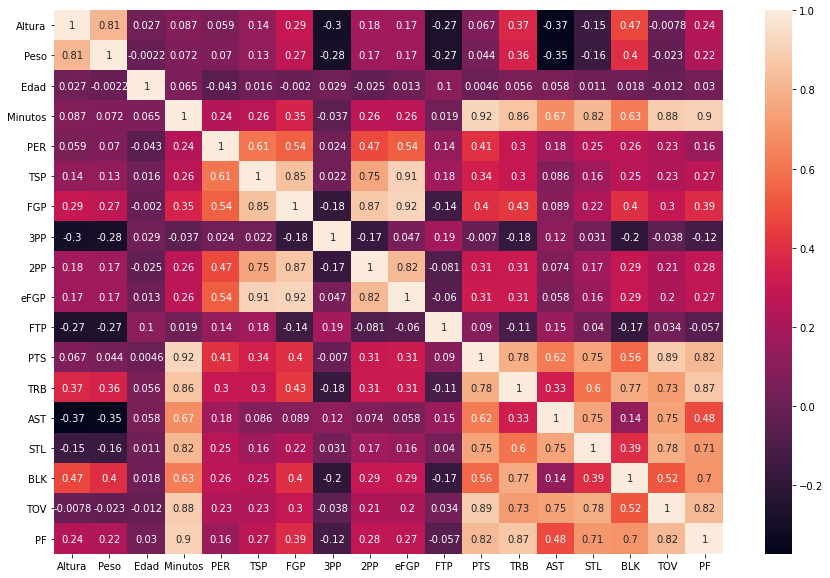

In [83]:
#Matriz correlacion de datos eliminando variables no numericas
Corr=dfsin
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(Corr.corr(), annot=True, ax=ax)
Corr.corr()
#Se observan como las variables altura y peso estan fuertemente correladas
#La variable minutos con todas las variables de estadisticas del jugador
#Las de lanzaminto también se encuentran correladas entre ellas

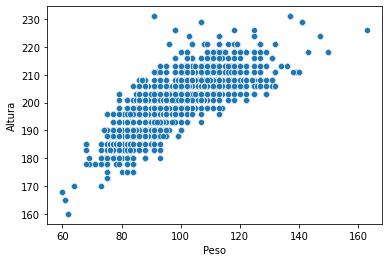

In [84]:
#Diagrama de dispersion Peso-Altura
sns.scatterplot(data=TFM, x="Peso", y="Altura")
#Se observa que cuando mayor es el peso, mayor es la altura

Text(0.5, 1.0, 'Peso vs Altura por Posición')

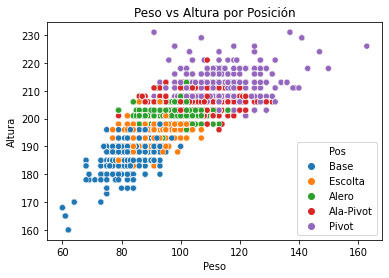

In [85]:
#Diagrama de dispersion Peso-Altura por Posicion
sns.scatterplot(data=TFM, x="Peso", y="Altura",hue="Pos",
                hue_order=["Base","Escolta","Alero","Ala-Pivot","Pivot"]).set_title("Peso vs Altura por Posición")
#Los jugadores se ordenan por posicion quedando en los extremos los bases y pivots

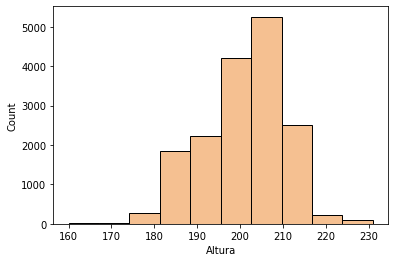

In [86]:
#Histograma de altura
sns.histplot(data=TFM, x='Altura', bins=10, color='#F2AB6D')

Text(0.5, 1.0, 'Histograma de Altura por Posición')

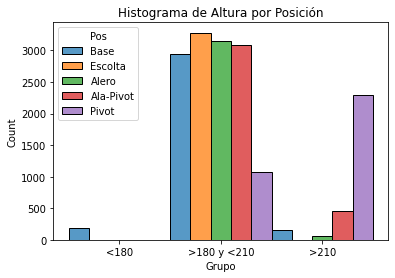

In [87]:
#Histograma de altura por posicion
AlturaClas = []
for i in range(0,len(TFM)):
    if TFM.Altura[i]<180:
          AlturaClas.append('<180')
    elif TFM.Altura[i]>180 and TFM.Altura[i]<210:
          AlturaClas.append('>180 y <210' )     
    else:
        AlturaClas.append('>210')
AlturaData = list(zip(TFM.Altura,AlturaClas,TFM.Pos))
AlturaData = pd.DataFrame(AlturaData)
AlturaData.columns = ['Altura','Grupo','Pos']
AlturaDataOrder=AlturaData.sort_values('Grupo')
sns.histplot(data = AlturaDataOrder, x='Grupo', hue="Pos", 
             hue_order=["Base","Escolta","Alero","Ala-Pivot","Pivot"],
             multiple="dodge").set_title("Histograma de Altura por Posición")
#El grueso mayor de jugadores se encuentran entre 180 y 210 cm, mientras que
#por debajo de 180 solo existen bases y por encima de 210 destacan os pivots

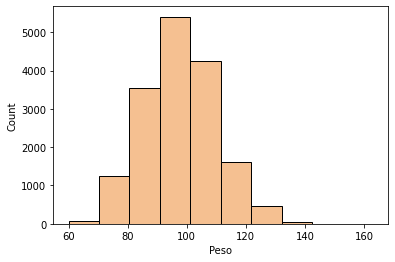

In [88]:
#Histograma de peso
sns.histplot(data=TFM, x='Peso', bins=10, color='#F2AB6D')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Text(0.5, 1.0, 'Histograma de Peso por Posición')

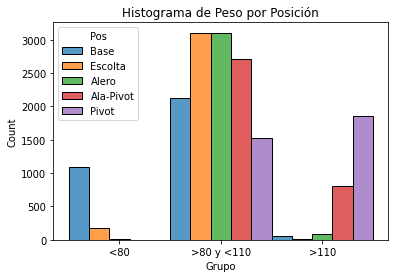

In [89]:
#Histograma de peso por posicion
PesoClas = []
for i in range(0,len(TFM)):
    if TFM.Peso[i]<80:
         PesoClas.append('<80')
    elif TFM.Peso[i]>80 and TFM.Peso[i]<110:
          PesoClas.append('>080 y <110')     
    else:
        PesoClas.append('>110')
        
PesoData = list(zip( TFM.Peso,PesoClas,TFM.Pos))
PesoData = pd.DataFrame(PesoData)
PesoData.columns = ['Peso','Grupo','Pos']
PesoDataOrder=PesoData.sort_values('Grupo')
for i in range(0,len(PesoDataOrder)):
    if PesoDataOrder.Grupo[i]=='>080 y <110':
         PesoDataOrder.Grupo[i]='>80 y <110'  
    else:
        PesoDataOrder.Grupo[i]=PesoDataOrder.Grupo[i]
        
sns.histplot(data = PesoDataOrder, x='Grupo', hue="Pos", 
             hue_order=["Base","Escolta","Alero","Ala-Pivot","Pivot"],
             multiple="dodge").set_title("Histograma de Peso por Posición")
#El grueso mayor de jugadores se encuentran entre 180 y 210 cm, mientras que
#por debajo de 180 solo existen bases y por encima de 210 destacan os pivots

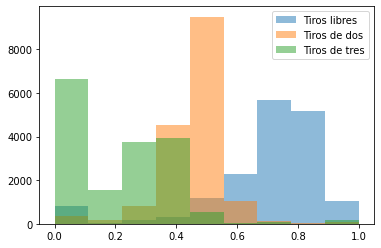

In [90]:
import numpy
from matplotlib import pyplot

bins = numpy.linspace(0, 1, 10)

pyplot.hist(TFM['FTP'], bins, alpha=0.5, label='Tiros libres')
pyplot.hist(TFM['2PP'], bins, alpha=0.5, label='Tiros de dos')
pyplot.hist(TFM['3PP'], bins, alpha=0.5, label='Tiros de tres')
pyplot.legend(loc='upper right')
pyplot.show()

Text(0.5, 1.0, 'Minutos vs Puntos por Posición')

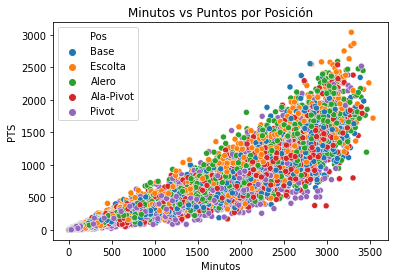

In [91]:
#Diagrama de dispersion Peso-Altura por Posicion
sns.scatterplot(data=TFM, x="Minutos", y="PTS",hue='Pos',
                hue_order=["Base","Escolta","Alero","Ala-Pivot","Pivot"]).set_title("Minutos vs Puntos por Posición")

Text(0.5, 1.0, 'Minutos vs Asistencias por Posición')

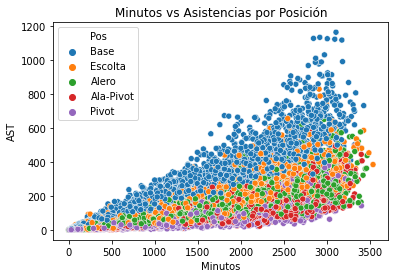

In [92]:
#Diagrama de dispersion Peso-Altura por Posicion
sns.scatterplot(data=TFM, x="Minutos", y="AST",hue='Pos',
                hue_order=["Base","Escolta","Alero","Ala-Pivot","Pivot"]).set_title("Minutos vs Asistencias por Posición")

Text(0.5, 1.0, 'Minutos vs Rebotes por Posición')

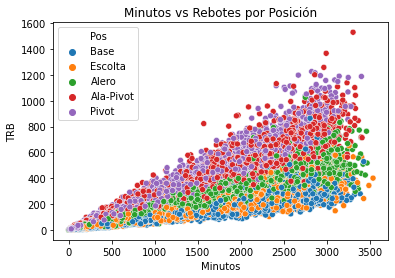

In [93]:
#Diagrama de dispersion Peso-Altura por Posicion
sns.scatterplot(data=TFM, x="Minutos", y="TRB",hue='Pos',
                hue_order=["Base","Escolta","Alero","Ala-Pivot","Pivot"]).set_title("Minutos vs Rebotes por Posición")

Text(0.5, 1.0, 'Minutos vs Tapones por Posición')

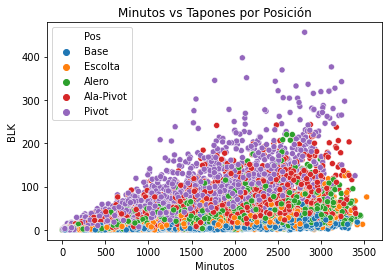

In [94]:
#Diagrama de dispersion Peso-Altura por Posicion
sns.scatterplot(data=TFM, x="Minutos", y="BLK",hue='Pos',
                hue_order=["Base","Escolta","Alero","Ala-Pivot","Pivot"]).set_title("Minutos vs Tapones por Posición")

Text(0.5, 1.0, 'Minutos vs Robos por Posición')

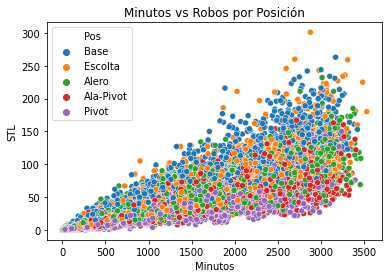

In [95]:
#Diagrama de dispersion Peso-Altura por Posicion
sns.scatterplot(data=TFM, x="Minutos", y="STL",hue='Pos',
                hue_order=["Base","Escolta","Alero","Ala-Pivot","Pivot"]).set_title("Minutos vs Robos por Posición")

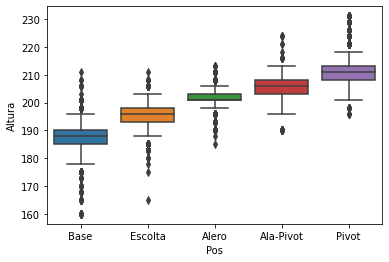

In [96]:
#Boxplot Altura por posicion
sns.boxplot(x="Pos", y="Altura", data=TFM,
            order=["Base","Escolta","Alero","Ala-Pivot","Pivot"])

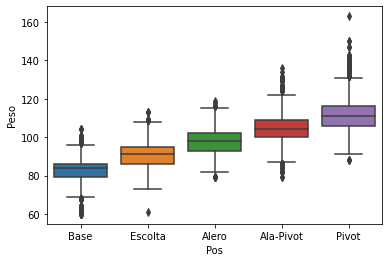

In [97]:
#Boxplot Peso por posicion
sns.boxplot(x="Pos", y="Peso", data=TFM,
            order=["Base","Escolta","Alero","Ala-Pivot","Pivot"])

###Análisis descriptivo

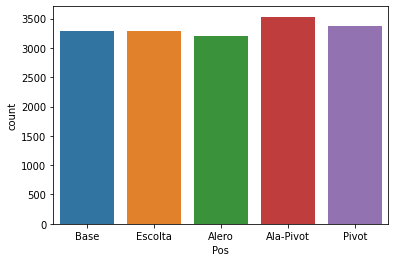

In [98]:
#Numero de jugadores por posicion
sns.countplot(x="Pos", data=TFM,
              order=["Base","Escolta","Alero","Ala-Pivot","Pivot"])

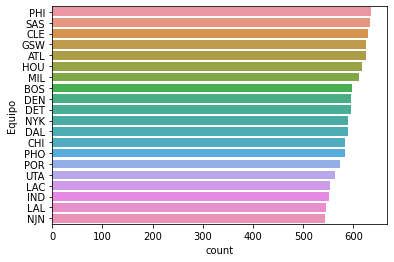

In [99]:
#Numero de jugadores por equipo
sns.countplot(y="Equipo", data=TFM,
              order=TFM.Equipo.value_counts().iloc[:20].index)
#Los equipos con mas jugadores en nuestra bbdd son los sixers y los spurs

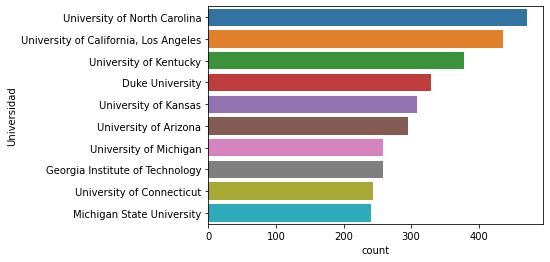

In [100]:
#Numero de jugadores por universidad
sns.countplot(y="Universidad", data=TFM,
              order=TFM.Universidad.value_counts().iloc[:10].index)
#Las dos universidades que mas jugadores han conseguido llevar a la nba son la
#de California y la de Carolina del Norte

In [101]:
#Se realiza un pequeño analisis descriptivo, se escogen los PTS, AST, RBT y BLK
Vis = TFM.iloc[:,[0,22,23,24,26]]
Vis = Vis.groupby(['Jugador']).sum()
Vis = Vis.rename_axis('Jugador').reset_index()

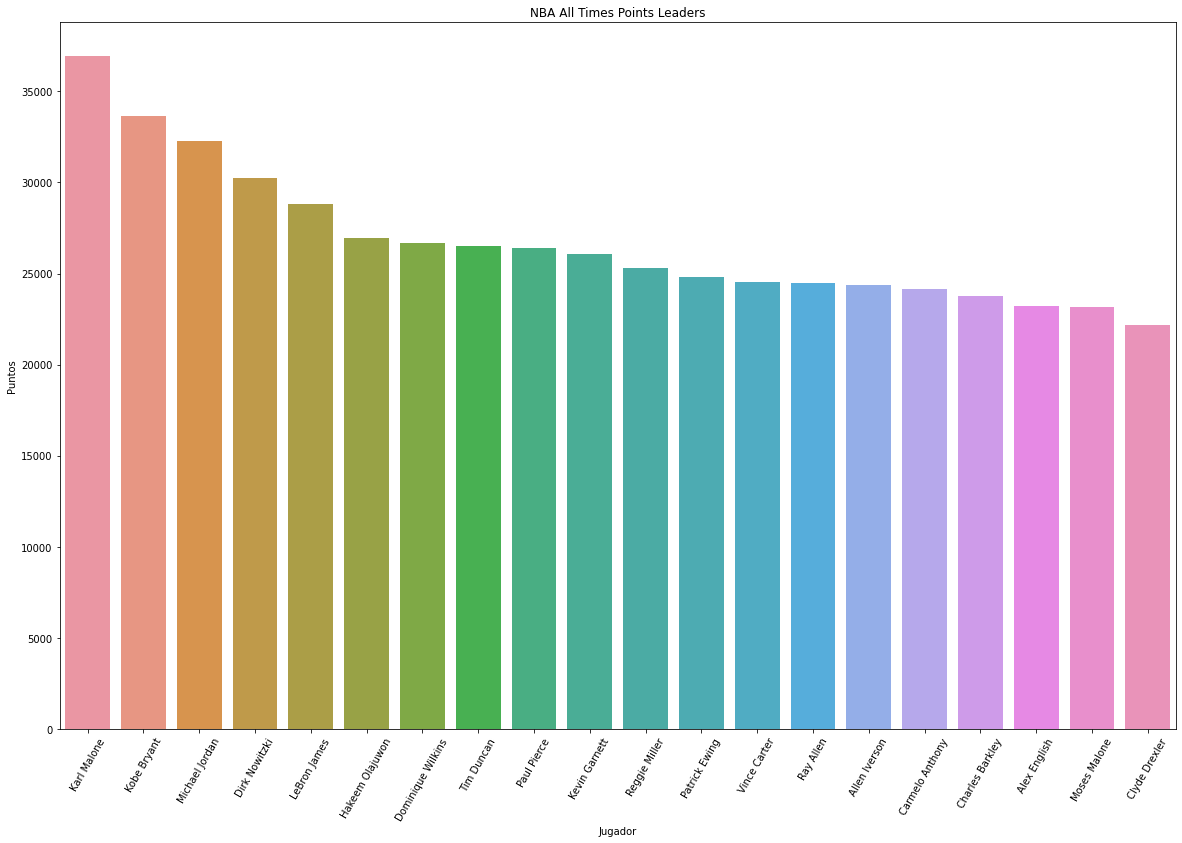

In [102]:
#Visualización: Puntos
dictionary={"Jugador":Vis.Jugador,"Puntos":Vis.PTS}
PuntosJugador=pd.DataFrame(dictionary)
PuntosJugador=PuntosJugador.sort_values("Puntos",ascending=False)

PuntosTop=PuntosJugador.head(20)

plt.figure(figsize=(20,13))
sns.barplot(x=PuntosTop.Jugador,y=PuntosTop.Puntos)
plt.xticks(rotation=60)
plt.ylabel("Puntos")
plt.xlabel("Jugador")
plt.title("NBA All Times Points Leaders")
plt.show()

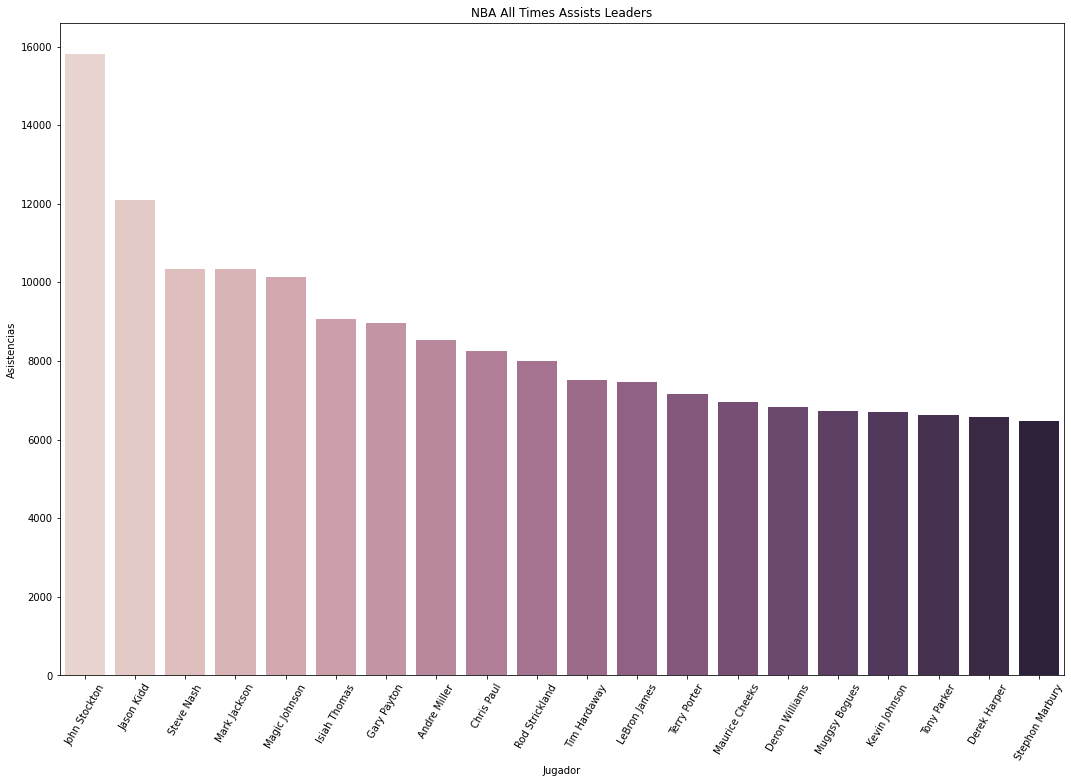

In [103]:
#Visualización: Asistencias
dictionary={"Jugador":Vis.Jugador,"Asistencias":Vis.AST}
AsistenciasJugador=pd.DataFrame(dictionary)
AsistenciasJugador=AsistenciasJugador.sort_values("Asistencias",ascending=False)

AsistenciasTop=AsistenciasJugador.head(20)

plt.figure(figsize=(18,12))
sns.barplot(x=AsistenciasTop.Jugador,y=AsistenciasTop.Asistencias,palette =sns.cubehelix_palette(len(AsistenciasTop)))
plt.xticks(rotation=60)
plt.ylabel("Asistencias")
plt.xlabel("Jugador")
plt.title("NBA All Times Assists Leaders")
plt.show()

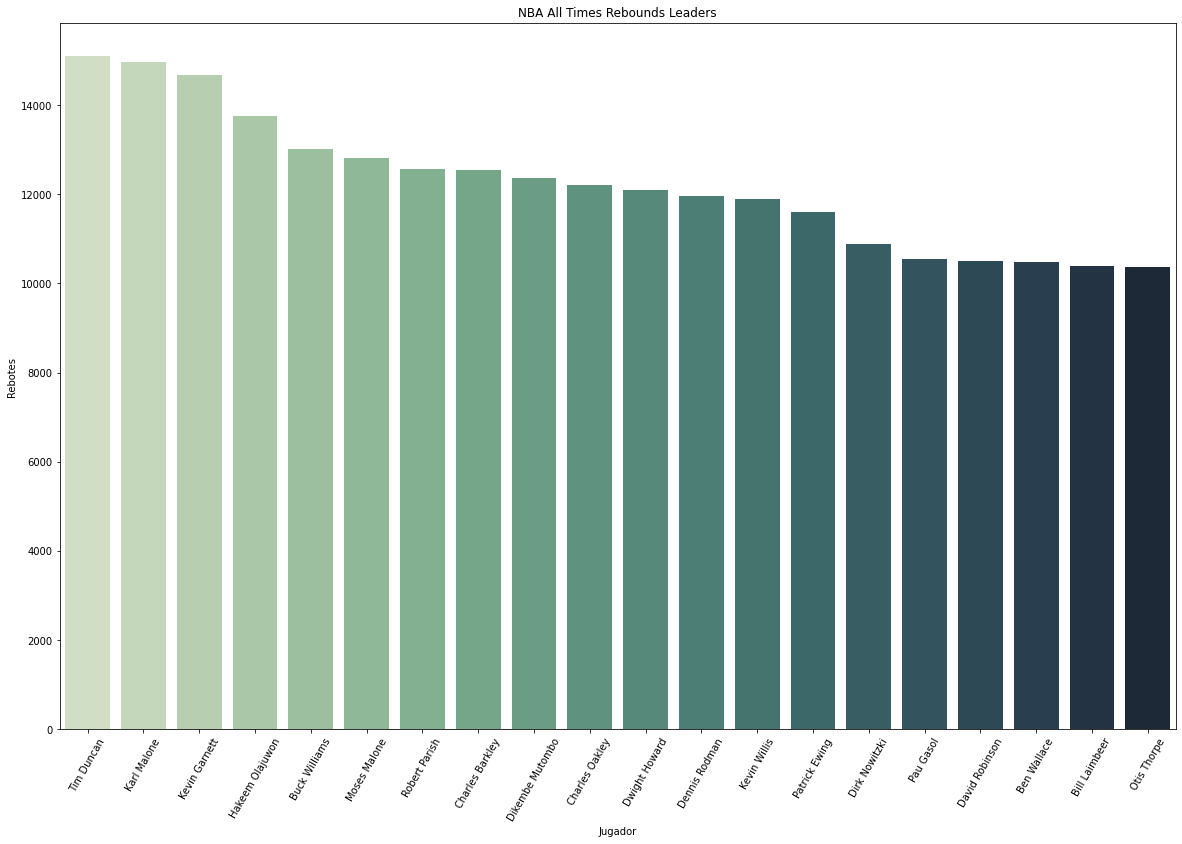

In [104]:
#Visualización: Rebotes
dictionary={"Jugador":Vis.Jugador,"Rebotes":Vis.TRB}
RebotesJugador=pd.DataFrame(dictionary)
RebotesJugador=RebotesJugador.sort_values("Rebotes",ascending=False)

RebotesTop=RebotesJugador.head(20)

plt.figure(figsize=(20,13))
sns.barplot(x=RebotesTop.Jugador,y=RebotesTop.Rebotes,palette=sns.cubehelix_palette(len(RebotesTop),rot=-.5))
plt.xticks(rotation=60)
plt.ylabel("Rebotes")
plt.xlabel("Jugador")
plt.title("NBA All Times Rebounds Leaders")
plt.show()

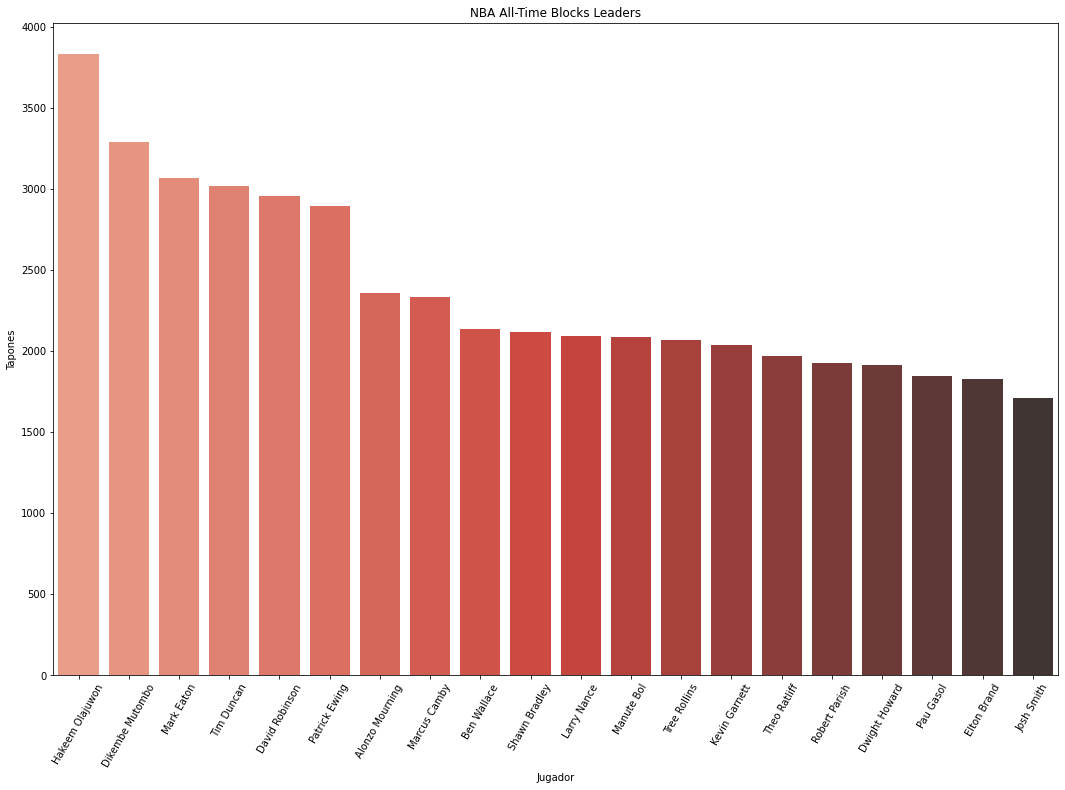

In [105]:
#Visualización: Tapones
dictionary={"Jugador":Vis.Jugador,"Tapones":Vis.BLK}
TaponesJugador=pd.DataFrame(dictionary)
TaponesJugador=TaponesJugador.sort_values("Tapones",ascending=False)

TaponesTop=TaponesJugador.head(20)

plt.figure(figsize=(18,12))
sns.barplot(x=TaponesTop.Jugador, y=TaponesTop.Tapones,palette =sns.color_palette("Reds_d",len(TaponesTop)))
plt.xticks(rotation=60)
plt.xlabel("Jugador")
plt.ylabel("Tapones")
plt.title("NBA All-Time Blocks Leaders")
plt.show()

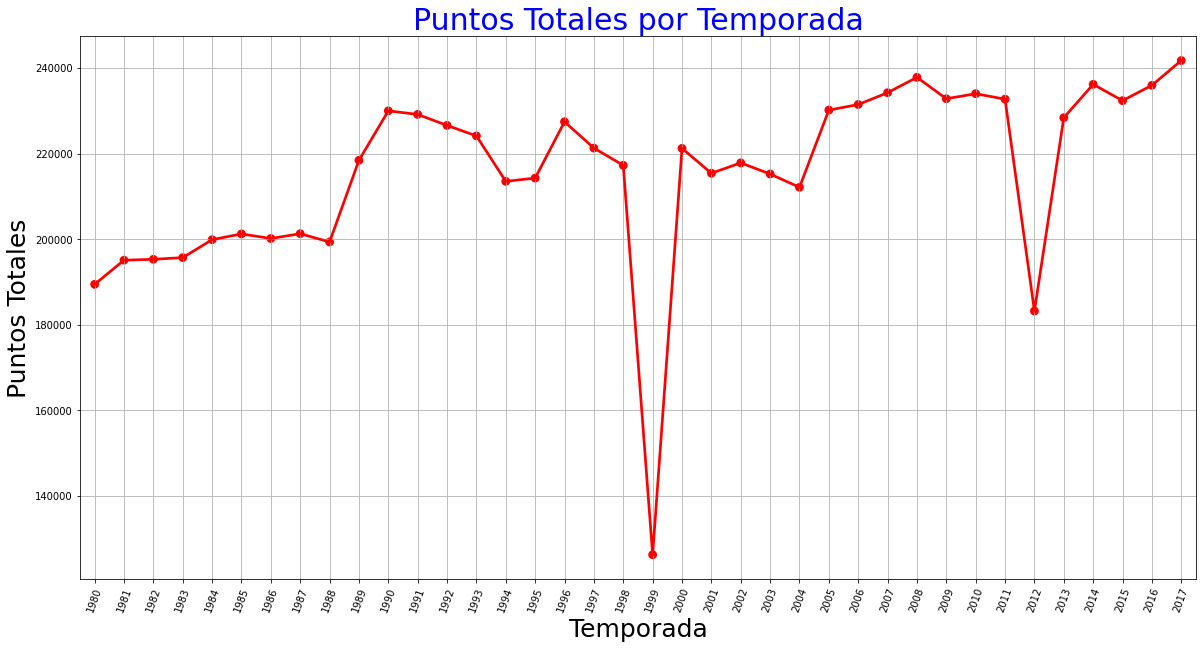

In [106]:
#Visualización: Puntos por temporada
temporada=[]
totales=[]
for i in TFM.Año.unique():
    temporada.append(i)
    total=0
    x=TFM[TFM.Año==i]
    for j in x.PTS:
        total+=int(j)
    totales.append(total)  
Datos2=pd.DataFrame({"Temporada":temporada,"Puntos":totales})

plt.subplots(figsize =(20,10))
sns.pointplot(x="Temporada",y="Puntos",data=Datos2,color="red",alpha=1.2)
plt.xlabel("Temporada",fontsize = 25)
plt.ylabel("Puntos Totales",fontsize = 25)
plt.xticks(rotation=70)
plt.title("Puntos Totales por Temporada",fontsize = 30,color='blue')
plt.grid()
#Durante las temporadas 98-99 y 11-12, se produjó un cierre patronal que obligó
#a reducir la temporada regular a 50 y 62 partidos respectivamente

In [107]:
#Se divide el conjunto de datos por posicion
Bases=TFM[TFM.Pos=="Base"]
Escoltas=TFM[TFM.Pos=="Escolta"]
Aleros=TFM[TFM.Pos=="Alero"]
AlaPivots=TFM[TFM.Pos=="Ala-Pivot"]
Pivots=TFM[TFM.Pos=="Pivot"]

DatosBases=Bases.groupby("Año").sum()
DatosEscoltas=Escoltas.groupby("Año").sum()
DatosAleros=Aleros.groupby("Año").sum()
DatosAlaPivots=AlaPivots.groupby("Año").sum()
DatosPivots=Pivots.groupby("Año").sum()


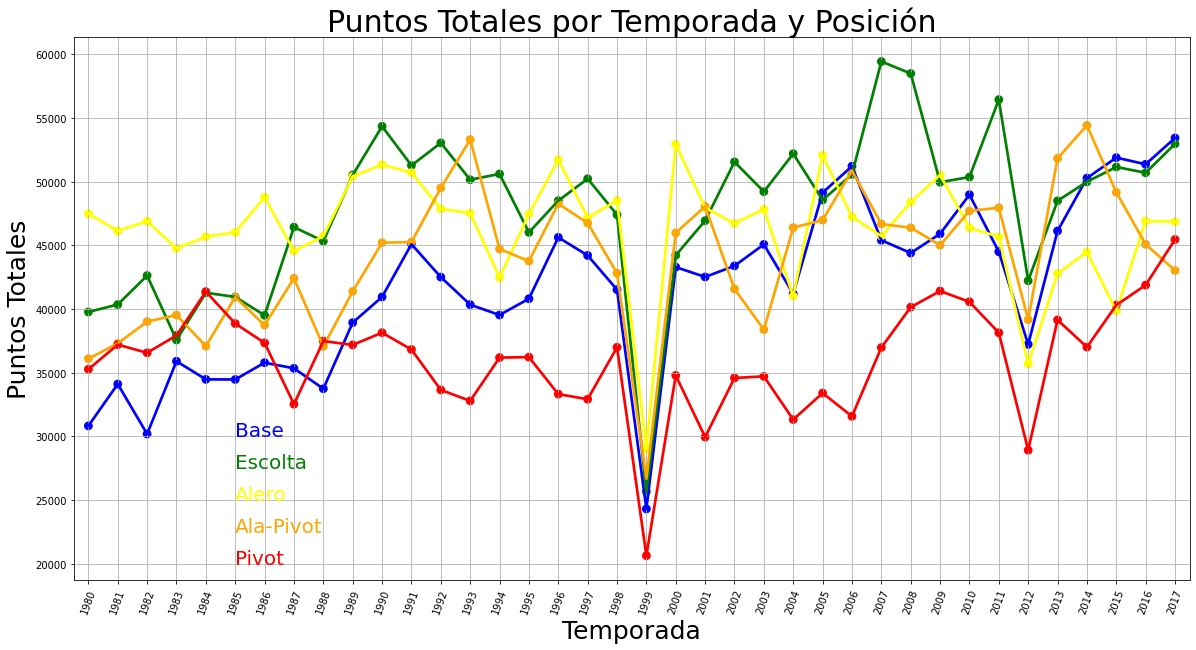

In [108]:
#Visualizacion puntos por posicion
plt.subplots(figsize =(20,10))
plot1=sns.pointplot(x=DatosBases.index,y="PTS",data=DatosBases,color="blue",alpha=1.0,label="Base")
plot2=sns.pointplot(x=DatosEscoltas.index,y="PTS",data=DatosEscoltas,color="green",alpha=1.0,label="Escolta")
plot3=sns.pointplot(x=DatosAleros.index,y="PTS",data=DatosAleros,color="yellow",alpha=1.0,label="Alero")
plot4=sns.pointplot(x=DatosAlaPivots.index,y="PTS",data=DatosAlaPivots,color="orange",alpha=1.0,label="Ala-Pivot")
plot5=sns.pointplot(x=DatosPivots.index,y="PTS",data=DatosPivots,color="red",alpha=1.0,label="Pivot")
plt.xlabel("Temporada",fontsize = 25)
plt.ylabel("Puntos Totales",fontsize = 25)
plt.xticks(rotation=70)
plt.title("Puntos Totales por Temporada y Posición",fontsize = 30)
plt.text(5,30000,"Base",color="blue",fontsize =20)
plt.text(5,27500,"Escolta",color="green",fontsize=20)
plt.text(5,25000,"Alero",color="yellow",fontsize =20)
plt.text(5,22500,"Ala-Pivot",color="orange",fontsize=20)
plt.text(5,20000,"Pivot",color="red",fontsize =20)
plt.grid()

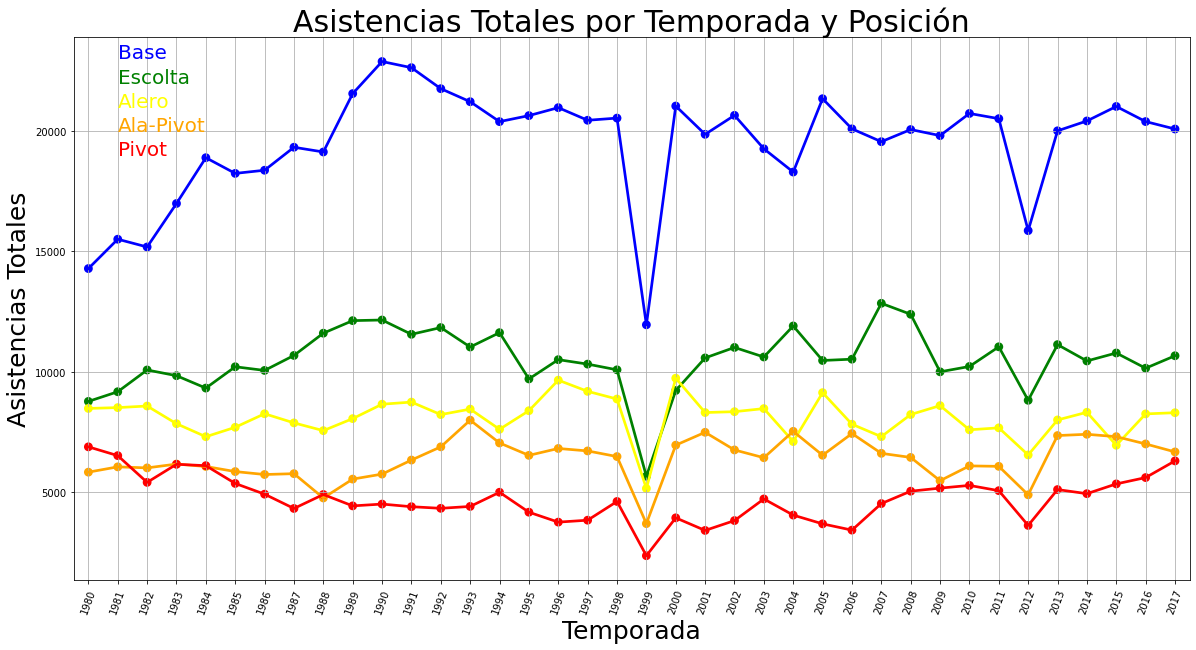

In [109]:
#Visualizacion asistencias por posicion
plt.subplots(figsize =(20,10))
plot1=sns.pointplot(x=DatosBases.index,y="AST",data=DatosBases,color="blue",alpha=1.0,label="Base")
plot2=sns.pointplot(x=DatosEscoltas.index,y="AST",data=DatosEscoltas,color="green",alpha=1.0,label="Escolta")
plot3=sns.pointplot(x=DatosAleros.index,y="AST",data=DatosAleros,color="yellow",alpha=1.0,label="Alero")
plot4=sns.pointplot(x=DatosAlaPivots.index,y="AST",data=DatosAlaPivots,color="orange",alpha=1.0,label="Ala-Pivot")
plot5=sns.pointplot(x=DatosPivots.index,y="AST",data=DatosPivots,color="red",alpha=1.0,label="Pivot")
plt.xlabel("Temporada",fontsize = 25)
plt.ylabel("Asistencias Totales",fontsize = 25)
plt.xticks(rotation=70)
plt.title("Asistencias Totales por Temporada y Posición",fontsize = 30)
plt.text(1,23000,"Base",color="blue",fontsize =20)
plt.text(1,22000,"Escolta",color="green",fontsize=20)
plt.text(1,21000,"Alero",color="yellow",fontsize =20)
plt.text(1,20000,"Ala-Pivot",color="orange",fontsize=20)
plt.text(1,19000,"Pivot",color="red",fontsize =20)
plt.grid()

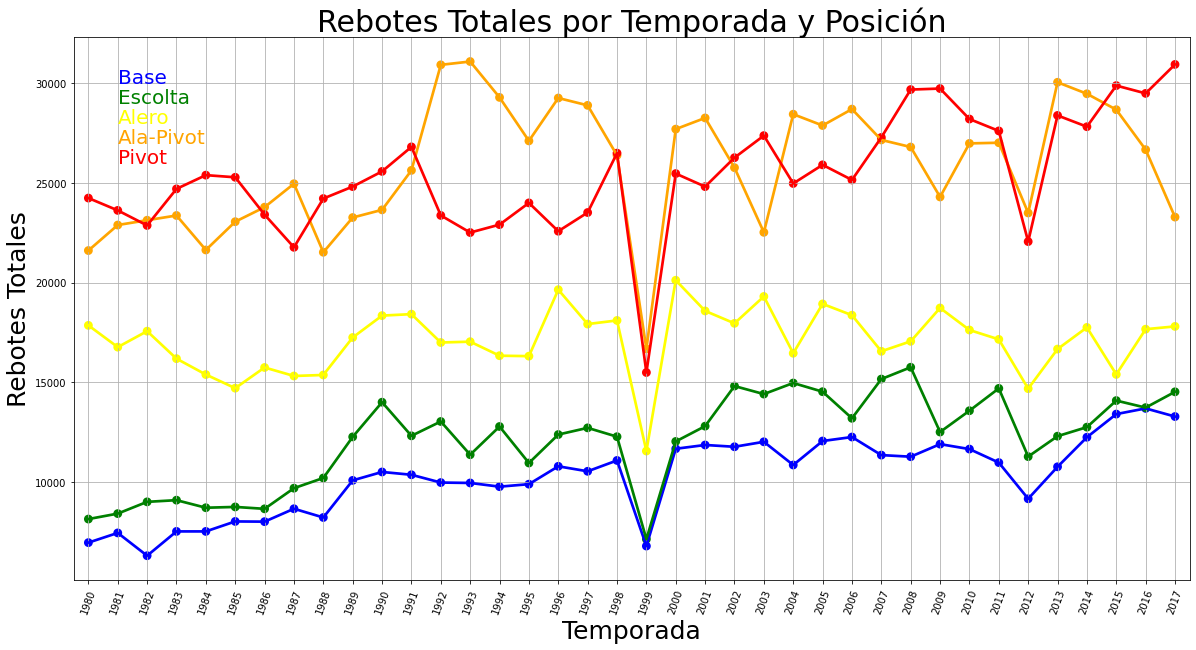

In [110]:
#Visualizacion rebotes por posicion
plt.subplots(figsize =(20,10))
plot1=sns.pointplot(x=DatosBases.index,y="TRB",data=DatosBases,color="blue",alpha=1.0,label="Base")
plot2=sns.pointplot(x=DatosEscoltas.index,y="TRB",data=DatosEscoltas,color="green",alpha=1.0,label="Escolta")
plot3=sns.pointplot(x=DatosAleros.index,y="TRB",data=DatosAleros,color="yellow",alpha=1.0,label="Alero")
plot4=sns.pointplot(x=DatosAlaPivots.index,y="TRB",data=DatosAlaPivots,color="orange",alpha=1.0,label="Ala-Pivot")
plot5=sns.pointplot(x=DatosPivots.index,y="TRB",data=DatosPivots,color="red",alpha=1.0,label="Pivot")
plt.xlabel("Temporada",fontsize = 25)
plt.ylabel("Rebotes Totales",fontsize = 25)
plt.xticks(rotation=70)
plt.title("Rebotes Totales por Temporada y Posición",fontsize = 30)
plt.text(1,30000,"Base",color="blue",fontsize =20)
plt.text(1,29000,"Escolta",color="green",fontsize=20)
plt.text(1,28000,"Alero",color="yellow",fontsize =20)
plt.text(1,27000,"Ala-Pivot",color="orange",fontsize=20)
plt.text(1,26000,"Pivot",color="red",fontsize =20)
plt.grid()

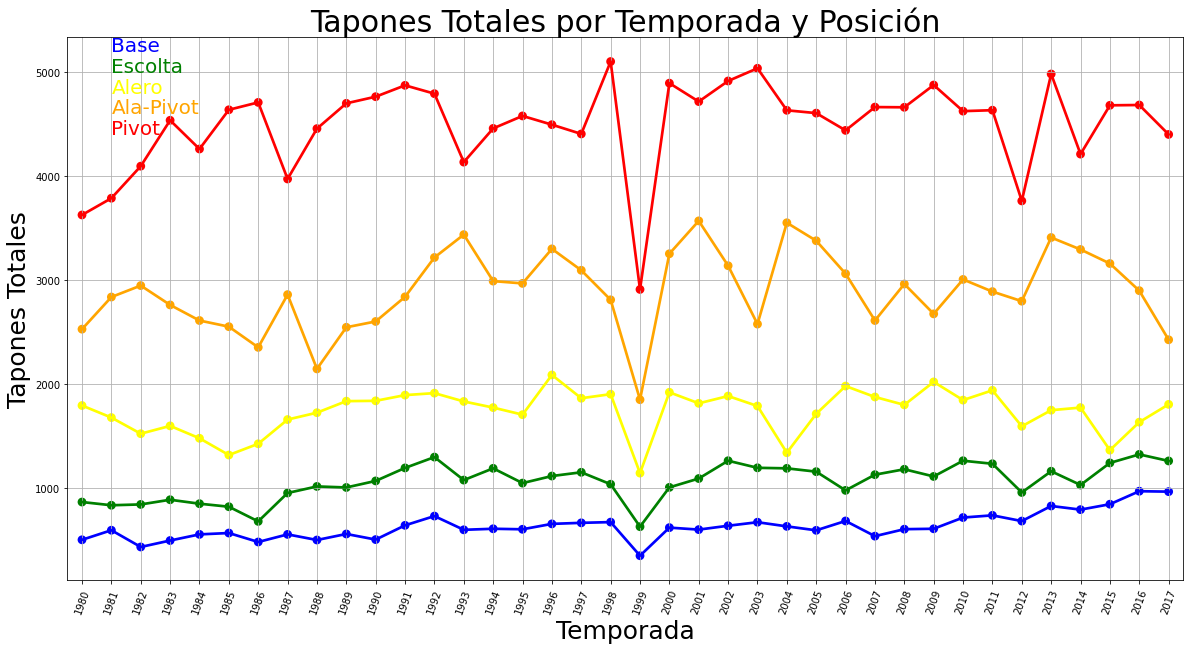

In [111]:
#Visualizacion tapones por posicion
plt.subplots(figsize =(20,10))
plot1=sns.pointplot(x=DatosBases.index,y="BLK",data=DatosBases,color="blue",alpha=1.0,label="Base")
plot2=sns.pointplot(x=DatosEscoltas.index,y="BLK",data=DatosEscoltas,color="green",alpha=1.0,label="Escolta")
plot3=sns.pointplot(x=DatosAleros.index,y="BLK",data=DatosAleros,color="yellow",alpha=1.0,label="Alero")
plot4=sns.pointplot(x=DatosAlaPivots.index,y="BLK",data=DatosAlaPivots,color="orange",alpha=1.0,label="Ala-Pivot")
plot5=sns.pointplot(x=DatosPivots.index,y="BLK",data=DatosPivots,color="red",alpha=1.0,label="Pivot")
plt.xlabel("Temporada",fontsize = 25)
plt.ylabel("Tapones Totales",fontsize = 25)
plt.xticks(rotation=70)
plt.title("Tapones Totales por Temporada y Posición",fontsize = 30)
plt.text(1,5200,"Base",color="blue",fontsize =20)
plt.text(1,5000,"Escolta",color="green",fontsize=20)
plt.text(1,4800,"Alero",color="yellow",fontsize =20)
plt.text(1,4600,"Ala-Pivot",color="orange",fontsize=20)
plt.text(1,4400,"Pivot",color="red",fontsize =20)
plt.grid()

###Selección de Variables: Random Forest

In [141]:
#Convertimos la columna pos en numerica, ya que la utilizaremos para predecir
for i in range(0,len(df)):
    if df.Pos[i]=='Base':
          df.Pos[i]=0
    elif df.Pos[i]=='Escolta':
          df.Pos[i]=1
    elif df.Pos[i]=='Alero':
          df.Pos[i]=2
    elif df.Pos[i]=='Ala-Pivot':
          df.Pos[i]=3      
    else:
        df.Pos[i]=4
        
for i in range(0,len(dfsin)):
    if dfsin.Pos[i]=='Base':
          dfsin.Pos[i]=0
    elif dfsin.Pos[i]=='Escolta':
          dfsin.Pos[i]=1
    elif dfsin.Pos[i]=='Alero':
          dfsin.Pos[i]=2
    elif dfsin.Pos[i]=='Ala-Pivot':
          dfsin.Pos[i]=3      
    else:
        dfsin.Pos[i]=4

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-pa

In [142]:
df = df.astype(str).astype(float)
dfsin = dfsin.astype(str).astype(float)

In [143]:
#Guardamos los encabezados de cada columna
headers = df.columns.values.tolist()
headers.remove('Pos')

In [144]:
#Creamos los conjuntos de train y test para el df con outliers
m_train     = np.random.rand(len(df)) < 0.8
data_train  = df.loc[m_train,headers].to_numpy()
data_test   = df.loc[~m_train,headers].to_numpy()
clase_train = df.loc[m_train,'Pos'].to_numpy()
clase_test  = df.loc[~m_train,'Pos'].to_numpy()

data_train = np.matrix(data_train)
data_test  = np.matrix(data_test) 

In [145]:
#Creamos los conjuntos de train y test para el df sin outliers
m_train2     = np.random.rand(len(dfsin)) < 0.8
data_train2  = dfsin.loc[m_train2,headers].to_numpy()
data_test2   = dfsin.loc[~m_train2,headers].to_numpy()
clase_train2 = dfsin.loc[m_train2,'Pos'].to_numpy()
clase_test2  = dfsin.loc[~m_train2,'Pos'].to_numpy()

data_train2 = np.matrix(data_train2)
data_test2  = np.matrix(data_test2) 

In [146]:
#Configuramos ambos modelos
from sklearn.ensemble import RandomForestClassifier 

modelo = RandomForestClassifier(
 random_state      = 1,   # semilla inicial de aleatoriedad del algoritmo
 n_estimators      = 666, # cantidad de arboles a crear
 min_samples_split = 2,   # cantidad minima de observaciones para dividir un nodo
 min_samples_leaf  = 1,   # observaciones minimas que puede tener una hoja del arbol
 n_jobs            = 1    # tareas en paralelo. para todos los cores disponibles usar -1
 )
modelo.fit(X = data_train, y = clase_train)

modelosin = RandomForestClassifier(
 random_state      = 1,   # semilla inicial de aleatoriedad del algoritmo
 n_estimators      = 666, # cantidad de arboles a crear
 min_samples_split = 2,   # cantidad minima de observaciones para dividir un nodo
 min_samples_leaf  = 1,   # observaciones minimas que puede tener una hoja del arbol
 n_jobs            = 1    # tareas en paralelo. para todos los cores disponibles usar -1
 )
modelosin.fit(X = data_train2, y = clase_train2)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=666, n_jobs=1,
                       oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [147]:
# Observamos la importancia de cada variable en ambos modelos

#Con outliers
var_imp = pd.DataFrame({
 'feature':headers, 
 'v_importance':modelo.feature_importances_.tolist()
 })
var_imp.sort_values(by=['v_importance'],ascending=False)

,feature,v_importance
0,Altura,0.261758
1,Peso,0.141396
13,AST,0.062210
7,3PP,0.054416
12,TRB,0.052494
15,BLK,0.044950
11,PTS,0.038368
3,Minutos,0.035921
6,FGP,0.034660
17,PF,0.033810


In [148]:
#Sin outliers
var_imp = pd.DataFrame({
 'feature':headers, 
 'v_importance':modelosin.feature_importances_.tolist()
 })
var_imp.sort_values(by=['v_importance'],ascending=False)

,feature,v_importance
0,Altura,0.252272
1,Peso,0.143481
13,AST,0.058438
12,TRB,0.054188
15,BLK,0.050214
7,3PP,0.045767
11,PTS,0.038299
17,PF,0.036568
3,Minutos,0.036192
14,STL,0.034161


In [149]:
#Solo existen dos cambios entre las 10 primeras, con outliers entran FGP y STL,
#mientras que sin outliers PF y FTP

#Reducimos ambos conjuntos a únicamente las 10 variables que mas peso tienen
df = df.drop(['eFGP','2PP','TSP','Edad','TOV',
                    'PER','FTP','PF'], axis=1)

dfsin = dfsin.drop(['eFGP','2PP','TSP','Edad','TOV',
                    'FGP','STL','PER'], axis=1)
#Ya disponemos de los conjuntos en perfecto estado para realizar la prediccion

#Modelos

In [150]:
#Librerias necesarias
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
import collections
from sklearn.metrics import confusion_matrix

In [151]:
#Creamos un conjunto X con todos los datos excepto la posicion, ya que queremos
#clasificar por ella para los datos con outliers
X = df.drop(['Pos'], axis=1)

#Creamos un conjunto y guardando la columna de posicion
y = df['Pos']

In [152]:
#Creamos los conjuntos de entrenamiento y test tanto de x como de y con la funcion
#train_test_split, fijamos la semilla en 42 y un tamaño del test del 20%
Xtrain, Xtest, ytrain, ytest = train_test_split(
    X, y, random_state=42, test_size=0.2)


In [153]:
Xtrain.shape
#El tamaño es de 13342 registros y 10 variables (80%)

(13342, 10)

In [154]:
Xtest.shape
#El tamaño es de 3336 registros y 10 variables (20%)

(3336, 10)

In [155]:
#Creamos los conjuntos para el df sin outliers
Xsin = dfsin.drop(['Pos'], axis=1)

ysin = dfsin['Pos']

In [156]:
#Creamos los conjuntos de entrenamiento y test tanto de x como de y con la funcion
#train_test_split, fijamos la semilla en 42 y un tamaño del test del 20%
Xtrain2, Xtest2, ytrain2, ytest2 = train_test_split(
    Xsin, ysin, random_state=42, test_size=0.2)

In [157]:
Xtrain2.shape
#El tamaño es de 5831 registros y 10 variables (80%)

(5831, 10)

In [158]:
Xtest2.shape
#El tamaño es de 1458 registros y 10 variables (20%)

(1458, 10)

###Regresión lineal

#####Modelo Con Outliers

In [159]:
#Convertimos los valores a una escala de 0-1
scaler = MinMaxScaler()
X_train_reg = scaler.fit_transform(Xtrain)
X_test_reg = scaler.transform(Xtest)
y_train_reg = ytrain

In [161]:
model = linear_model.LinearRegression()
model.fit(X_train_reg, y_train_reg)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [162]:
#Realizamos la prediccion sobre el test
y_pred = model.predict(X_test_reg)

In [163]:
# Redondeamos el resultado y convertimos en entero
y = np.rint(y_pred)
y = y.astype(int) 
res = np.hstack(y)

In [164]:
#Contamos las aparaciones de cada elemento
print(collections.Counter(res))

Counter({3: 977, 2: 773, 1: 715, 0: 432, 4: 350, -1: 48, 5: 26, -2: 7, 6: 5, -3: 3})


In [165]:
#Existen algunos valores negativos, por lo que los convertimos a cero, y
#los valores mayores que cuatro a 4
Reg_results = res.copy()
Reg_results[y_pred < 0] = 0
Reg_results[y_pred > 4] = 4
Reg_results

array([3, 3, 3, ..., 2, 4, 1])

In [166]:
#Generamos el resultado
Resultado = pd.DataFrame({'Pos':ytest , 'Pos_Predict': Reg_results})

In [167]:
#Volvemos a renombrar los valores en ambas columnas
for i in range(0,len(Resultado)):
    if Resultado.iloc[i,0]==0:
          Resultado.iloc[i,0]='Base'
    elif Resultado.iloc[i,0]==1:
          Resultado.iloc[i,0]='Escolta'
    elif Resultado.iloc[i,0]==2:
          Resultado.iloc[i,0]='Alero'
    elif Resultado.iloc[i,0]==3:
          Resultado.iloc[i,0]='Ala-Pivot'     
    else:
        Resultado.iloc[i,0]='Pivot'

#Volvemos a renombrar los valores en ambas columnas
for i in range(0,len(Resultado)):
    if Resultado.iloc[i,1]==0:
          Resultado.iloc[i,1]='Base'
    elif Resultado.iloc[i,1]==1:
          Resultado.iloc[i,1]='Escolta'
    elif Resultado.iloc[i,1]==2:
          Resultado.iloc[i,1]='Alero'
    elif Resultado.iloc[i,1]==3:
          Resultado.iloc[i,1]='Ala-Pivot'     
    else:
        Resultado.iloc[i,1]='Pivot'

In [168]:
#Creamos la matriz de confusion
cm = confusion_matrix(Resultado['Pos'],Resultado['Pos_Predict'])

[Text(33.0, 0.5, 'Valores predichos'),
 Text(0.5, 15.0, 'Valores reales'),
 Text(0.5, 1.0, 'Matriz de Confusion')]

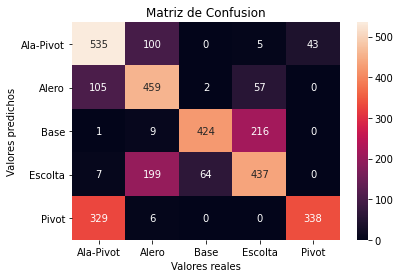

In [170]:
#Plot
sns.heatmap(cm, annot=True,fmt="d",
            xticklabels=['Ala-Pivot','Alero','Base','Escolta','Pivot'], 
            yticklabels=['Ala-Pivot','Alero','Base','Escolta',
                         'Pivot']).set(title='Matriz de Confusion', xlabel='Valores reales', ylabel='Valores predichos')
#Existen problemas en casi todas las posiciones

In [171]:
contador=0
for i in range(0,len(Resultado)):
    if Resultado.iloc[i,1]==Resultado.iloc[i,0]:
          contador=contador+1   
    else:
        contador=contador 
proporcion=(contador/len(Resultado))*100
print('El modelo tiene un acierto del:'+" "+ str(round(proporcion,2)))

El modelo tiene un acierto del: 65.74


#####Modelo Sin Outliers

In [172]:
#Convertimos los valores a una escala de 0-1
scaler = MinMaxScaler()
X_train_reg = scaler.fit_transform(Xtrain2)
X_test_reg = scaler.transform(Xtest2)
y_train_reg = ytrain2

In [173]:
#Aplicamos el modelo
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X_train_reg, y_train_reg)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [174]:
#Realizamos la prediccion sobre el test
y_pred = model.predict(X_test_reg)

# Redondeamos el resultado y convertimos en entero
import numpy as np
y = np.rint(y_pred)
y = y.astype(int) 
res = np.hstack(y)

In [175]:
#Contamos las aparaciones de cada elemento
import collections
print(collections.Counter(res))

Counter({3: 479, 2: 297, 1: 237, 4: 205, 0: 195, -1: 30, 5: 14, -2: 1})


In [176]:
#Existen algunos valores negativos, por lo que los convertimos a cero, y
#los valores mayores qe cuatro a cuatrp
Reg_results = res.copy()
Reg_results[y_pred < 0] = 0
Reg_results[y_pred > 4] = 4
Reg_results


array([1, 4, 0, ..., 1, 3, 3])

In [177]:
#Generamos el resultado
Resultado2 = pd.DataFrame({'Pos':ytest2 , 'Pos_Predict': Reg_results})

In [178]:
#Volvemos a renombrar los valores en ambas columnas
for i in range(0,len(Resultado2)):
    if Resultado2.iloc[i,0]==0:
          Resultado2.iloc[i,0]='Base'
    elif Resultado2.iloc[i,0]==1:
          Resultado2.iloc[i,0]='Escolta'
    elif Resultado2.iloc[i,0]==2:
          Resultado2.iloc[i,0]='Alero'
    elif Resultado2.iloc[i,0]==3:
          Resultado2.iloc[i,0]='Ala-Pivot'     
    else:
        Resultado2.iloc[i,0]='Pivot'

#Volvemos a renombrar los valores en ambas columnas
for i in range(0,len(Resultado2)):
    if Resultado2.iloc[i,1]==0:
          Resultado2.iloc[i,1]='Base'
    elif Resultado2.iloc[i,1]==1:
          Resultado2.iloc[i,1]='Escolta'
    elif Resultado2.iloc[i,1]==2:
          Resultado2.iloc[i,1]='Alero'
    elif Resultado2.iloc[i,1]==3:
          Resultado2.iloc[i,1]='Ala-Pivot'     
    else:
        Resultado2.iloc[i,1]='Pivot'

In [179]:
#Creamos la matriz de confusiom
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Resultado2['Pos'],Resultado2['Pos_Predict'])

[Text(33.0, 0.5, 'Valores predichos'),
 Text(0.5, 15.0, 'Valores reales'),
 Text(0.5, 1.0, 'Matriz de Confusion')]

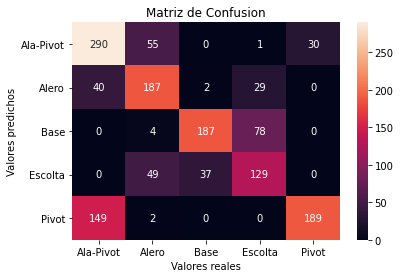

In [180]:
#Plot
sns.heatmap(cm, annot=True,fmt="d",
            xticklabels=['Ala-Pivot','Alero','Base','Escolta','Pivot'], 
            yticklabels=['Ala-Pivot','Alero','Base','Escolta',
                         'Pivot']).set(title='Matriz de Confusion', xlabel='Valores reales', ylabel='Valores predichos')
#Existen menos problemas, notables solo entre pivot y ala-pivot

In [181]:
contador=0
for i in range(0,len(Resultado2)):
    if Resultado2.iloc[i,1]==Resultado2.iloc[i,0]:
          contador=contador+1   
    else:
        contador=contador 
proporcion=(contador/len(Resultado2))*100
print('El modelo tiene un acierto del:'+" "+ str(round(proporcion,2)))

El modelo tiene un acierto del: 67.35


###KNN

In [185]:
from sklearn import neighbors
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import numpy as np

#####Modelo Con Outliers

In [186]:
trainKNN, testKNN = train_test_split(
    df, random_state=42, test_size=0.2)

trainKNN.reset_index(drop = True, inplace = True)
testKNN.reset_index(drop = True, inplace = True)

In [187]:
#Convertimos los valores a una escala de 0-1 excepto la ultima columna
scaler = MinMaxScaler()
trainKNNz = scaler.fit_transform(trainKNN.iloc[:,0:10])
testKNNz = scaler.transform(testKNN.iloc[:,0:10])
trainKNNz = pd.DataFrame(trainKNNz)
trainKNN=pd.concat([trainKNNz,trainKNN.Pos], axis=1)
testKNNz = pd.DataFrame(testKNNz)
testKNN=pd.concat([testKNNz,testKNN.Pos], axis=1)

Min Value uniform : 0.35355741070074914 (7)
Min Value distance : 0.35081413587013016 (8)


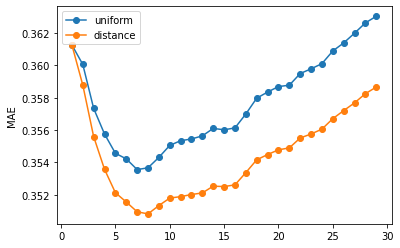

In [188]:
cv = KFold(n_splits = 10, shuffle = False) 

for i, weights in enumerate(['uniform', 'distance']):
   total_scores = []
   for n_neighbors in range(1,30):
       fold_accuracy = []
       knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
       # verificar cada uno de los modelos con validación cruzada.
       for train_fold, test_fold in cv.split(trainKNN):
          # División train test aleatoria
          f_train = trainKNN.loc[train_fold]
          f_test = trainKNN.loc[test_fold]
          # entrenamiento y ejecución del modelo
          knn.fit( X = f_train.drop(['Pos'], axis=1), 
                               y = f_train['Pos'])
          y_pred = knn.predict(X = f_test.drop(['Pos'], axis = 1))
          # evaluación del modelo
          mae = mean_absolute_error(f_test['Pos'], y_pred)
          fold_accuracy.append(mae)
       total_scores.append(sum(fold_accuracy)/len(fold_accuracy))
   
   plt.plot(range(1,len(total_scores)+1), total_scores, 
             marker='o', label=weights)
   print ('Min Value ' +  weights + " : " +  str(min(total_scores)) +" (" + str(np.argmin(total_scores) + 1) + ")")
   plt.ylabel('MAE')      
    
plt.legend()
plt.show() 

In [189]:
n_neighbors = 20
weights = 'distance'
knn = neighbors.KNeighborsRegressor(n_neighbors= n_neighbors, weights=weights) 


knn.fit( X = trainKNN.drop(['Pos'], axis=1), y = trainKNN['Pos'])
y_pred = knn.predict(X = testKNN.drop(['Pos'], axis = 1))
mae = mean_absolute_error(testKNN['Pos'], y_pred)
print ('MAE', mae)

MAE 0.3474765409432283


In [190]:
import numpy as np
y = np.rint(y_pred)
y = y.astype(int) 
res = np.hstack(y)

#Contamos las aparaciones de cada elemento
import collections
print(collections.Counter(res))
KNN_results = res.copy()

Counter({3: 795, 0: 704, 1: 647, 2: 633, 4: 557})


In [191]:
#Generamos el resultado
Resultado3 = pd.DataFrame({'Pos':testKNN.Pos , 'Pos_Predict': KNN_results})

In [192]:
#Volvemos a renombrar los valores en ambas columnas
for i in range(0,len(Resultado3)):
    if Resultado3.iloc[i,0]==0:
          Resultado3.iloc[i,0]='Base'
    elif Resultado3.iloc[i,0]==1:
          Resultado3.iloc[i,0]='Escolta'
    elif Resultado3.iloc[i,0]==2:
          Resultado3.iloc[i,0]='Alero'
    elif Resultado3.iloc[i,0]==3:
          Resultado3.iloc[i,0]='Ala-Pivot'     
    else:
        Resultado3.iloc[i,0]='Pivot'

#Volvemos a renombrar los valores en ambas columnas
for i in range(0,len(Resultado3)):
    if Resultado3.iloc[i,1]==0:
          Resultado3.iloc[i,1]='Base'
    elif Resultado3.iloc[i,1]==1:
          Resultado3.iloc[i,1]='Escolta'
    elif Resultado3.iloc[i,1]==2:
          Resultado3.iloc[i,1]='Alero'
    elif Resultado3.iloc[i,1]==3:
          Resultado3.iloc[i,1]='Ala-Pivot'     
    else:
        Resultado3.iloc[i,1]='Pivot'

In [193]:
#Creamos la matriz de confusion
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Resultado3['Pos'],Resultado3['Pos_Predict'])

[Text(33.0, 0.5, 'Valores predichos'),
 Text(0.5, 15.0, 'Valores reales'),
 Text(0.5, 1.0, 'Matriz de Confusion')]

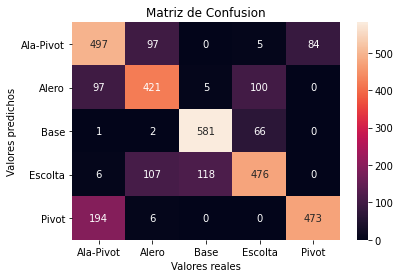

In [194]:
#Plot
sns.heatmap(cm, annot=True,fmt="d",
            xticklabels=['Ala-Pivot','Alero','Base','Escolta','Pivot'], 
            yticklabels=['Ala-Pivot','Alero','Base','Escolta',
                         'Pivot']).set(title='Matriz de Confusion', xlabel='Valores reales', ylabel='Valores predichos')

In [195]:
#Comprobamos el porcentaje de acierto
contador=0
for i in range(0,len(Resultado3)):
    if Resultado3.iloc[i,1]==Resultado3.iloc[i,0]:
          contador=contador+1   
    else:
        contador=contador 
proporcion=(contador/len(Resultado3))*100
print('El modelo tiene un acierto del:'+" "+ str(round(proporcion,2)))

El modelo tiene un acierto del: 73.38


#####Modelo Sin Outliers

In [196]:
trainKNN2, testKNN2 = train_test_split(
    dfsin, random_state=42, test_size=0.2)

trainKNN2.reset_index(drop = True, inplace = True)
testKNN2.reset_index(drop = True, inplace = True)

In [197]:
#Convertimos los valores a una escala de 0-1
scaler = MinMaxScaler()
trainKNN2z = scaler.fit_transform(trainKNN2.iloc[:,0:10])
testKNN2z = scaler.transform(testKNN2.iloc[:,0:10])
trainKNN2z = pd.DataFrame(trainKNN2z)
trainKNN2=pd.concat([trainKNN2z,trainKNN2.Pos], axis=1)
testKNN2z = pd.DataFrame(testKNN2z)
testKNN2=pd.concat([testKNN2z,testKNN2.Pos], axis=1)

Min Value uniform : 0.401061663416277 (9)
Min Value distance : 0.39948746984777755 (9)


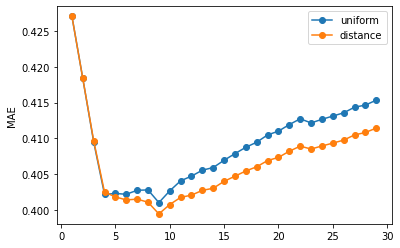

In [198]:
cv = KFold(n_splits = 10, shuffle = False) 

for i, weights in enumerate(['uniform', 'distance']):
   total_scores = []
   for n_neighbors in range(1,30):
       fold_accuracy = []
       knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
       # verificar cada uno de los modelos con validación cruzada.
       for train_fold, test_fold in cv.split(trainKNN2):
          # División train test aleatoria
          f_train = trainKNN2.loc[train_fold]
          f_test = trainKNN2.loc[test_fold]
          # entrenamiento y ejecución del modelo
          knn.fit( X = f_train.drop(['Pos'], axis=1), 
                               y = f_train['Pos'])
          y_pred = knn.predict(X = f_test.drop(['Pos'], axis = 1))
          # evaluación del modelo
          mae = mean_absolute_error(f_test['Pos'], y_pred)
          fold_accuracy.append(mae)
       total_scores.append(sum(fold_accuracy)/len(fold_accuracy))
   
   plt.plot(range(1,len(total_scores)+1), total_scores, 
             marker='o', label=weights)
   print ('Min Value ' +  weights + " : " +  str(min(total_scores)) +" (" + str(np.argmin(total_scores) + 1) + ")")
   plt.ylabel('MAE')      
    
plt.legend()
plt.show() 


In [199]:
n_neighbors = 20
weights = 'distance'
knn = neighbors.KNeighborsRegressor(n_neighbors= n_neighbors, weights=weights) 


knn.fit( X = trainKNN2.drop(['Pos'], axis=1), y = trainKNN2['Pos'])
y_pred = knn.predict(X = testKNN2.drop(['Pos'], axis = 1))
mae = mean_absolute_error(testKNN2['Pos'], y_pred)
print ('MAE', mae)


MAE 0.3953187901598374


In [200]:
import numpy as np
y = np.rint(y_pred)
y = y.astype(int) 
res = np.hstack(y)

#Contamos las aparaciones de cada elemento
import collections
print(collections.Counter(res))

KNN_results2 = res.copy()

Counter({3: 439, 4: 276, 0: 267, 2: 250, 1: 226})


In [201]:
#Generamos el resultado
Resultado4 = pd.DataFrame({'Pos':testKNN2.Pos , 'Pos_Predict': KNN_results2})

In [202]:
#Volvemos a renombrar los valores en ambas columnas
for i in range(0,len(Resultado4)):
    if Resultado4.iloc[i,0]==0:
          Resultado4.iloc[i,0]='Base'
    elif Resultado4.iloc[i,0]==1:
          Resultado4.iloc[i,0]='Escolta'
    elif Resultado4.iloc[i,0]==2:
          Resultado4.iloc[i,0]='Alero'
    elif Resultado4.iloc[i,0]==3:
          Resultado4.iloc[i,0]='Ala-Pivot'     
    else:
        Resultado4.iloc[i,0]='Pivot'

#Volvemos a renombrar los valores en ambas columnas
for i in range(0,len(Resultado4)):
    if Resultado4.iloc[i,1]==0:
          Resultado4.iloc[i,1]='Base'
    elif Resultado4.iloc[i,1]==1:
          Resultado4.iloc[i,1]='Escolta'
    elif Resultado4.iloc[i,1]==2:
          Resultado4.iloc[i,1]='Alero'
    elif Resultado4.iloc[i,1]==3:
          Resultado4.iloc[i,1]='Ala-Pivot'     
    else:
        Resultado4.iloc[i,1]='Pivot'

In [203]:
#Creamos la matriz de confusion
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Resultado4['Pos'],Resultado4['Pos_Predict'])

[Text(33.0, 0.5, 'Valores predichos'),
 Text(0.5, 15.0, 'Valores reales'),
 Text(0.5, 1.0, 'Matriz de Confusion')]

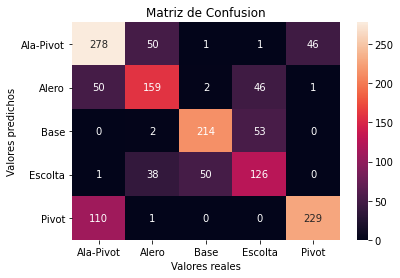

In [204]:
#Plot
sns.heatmap(cm, annot=True,fmt="d",
            xticklabels=['Ala-Pivot','Alero','Base','Escolta','Pivot'], 
            yticklabels=['Ala-Pivot','Alero','Base','Escolta',
                         'Pivot']).set(title='Matriz de Confusion', xlabel='Valores reales', ylabel='Valores predichos')

In [205]:
#Comprobamos el porcentaje de acierto
contador=0
for i in range(0,len(Resultado4)):
    if Resultado4.iloc[i,1]==Resultado4.iloc[i,0]:
          contador=contador+1   
    else:
        contador=contador 
proporcion=(contador/len(Resultado4))*100
print('El modelo tiene un acierto del:'+" "+ str(round(proporcion,2)))

El modelo tiene un acierto del: 69.0


###Random Forest

#####Modelo Con Outliers

In [206]:
#Realizamos la prediccion del modelo realizado anteriormente
prediccion = modelo.predict(data_test)
prediccion = prediccion.astype(int) 
res = np.hstack(prediccion)

In [207]:
#Contamos las aparaciones de cada elemento
print(collections.Counter(res))
RF_results = res.copy()

Counter({3: 735, 4: 687, 0: 679, 2: 650, 1: 625})


In [208]:
#Generamos el resultado
Resultado5 = pd.DataFrame({'Pos':clase_test , 'Pos_Predict': RF_results})

In [209]:
#Volvemos a renombrar los valores en ambas columnas
for i in range(0,len(Resultado5)):
    if Resultado5.iloc[i,0]==0:
          Resultado5.iloc[i,0]='Base'
    elif Resultado5.iloc[i,0]==1:
          Resultado5.iloc[i,0]='Escolta'
    elif Resultado5.iloc[i,0]==2:
          Resultado5.iloc[i,0]='Alero'
    elif Resultado5.iloc[i,0]==3:
          Resultado5.iloc[i,0]='Ala-Pivot'     
    else:
        Resultado5.iloc[i,0]='Pivot'

#Volvemos a renombrar los valores en ambas columnas
for i in range(0,len(Resultado5)):
    if Resultado5.iloc[i,1]==0:
          Resultado5.iloc[i,1]='Base'
    elif Resultado5.iloc[i,1]==1:
          Resultado5.iloc[i,1]='Escolta'
    elif Resultado5.iloc[i,1]==2:
          Resultado5.iloc[i,1]='Alero'
    elif Resultado5.iloc[i,1]==3:
          Resultado5.iloc[i,1]='Ala-Pivot'     
    else:
        Resultado5.iloc[i,1]='Pivot'

In [210]:
#Creamos la matriz de confusion
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Resultado5['Pos'],Resultado5['Pos_Predict'])

[Text(33.0, 0.5, 'Valores predichos'),
 Text(0.5, 15.0, 'Valores reales'),
 Text(0.5, 1.0, 'Matriz de Confusion')]

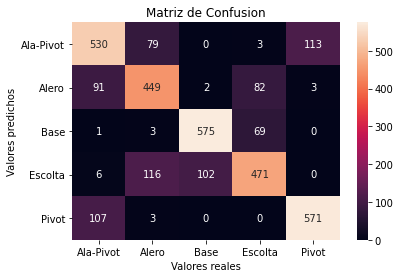

In [211]:
#Plot
sns.heatmap(cm, annot=True,fmt="d",
            xticklabels=['Ala-Pivot','Alero','Base','Escolta','Pivot'], 
            yticklabels=['Ala-Pivot','Alero','Base','Escolta',
                         'Pivot']).set(title='Matriz de Confusion', xlabel='Valores reales', ylabel='Valores predichos')

In [212]:
#Comprobamos el porcentaje de acierto
contador=0
for i in range(0,len(Resultado5)):
    if Resultado5.iloc[i,1]==Resultado5.iloc[i,0]:
          contador=contador+1   
    else:
        contador=contador 
proporcion=(contador/len(Resultado5))*100
print('El modelo tiene un acierto del:'+" "+ str(round(proporcion,2)))

El modelo tiene un acierto del: 76.9


#####Modelo Sin Outliers

In [213]:
prediccion = modelosin.predict(data_test2)
prediccion = prediccion.astype(int) 
res = np.hstack(prediccion)


In [214]:
#Contamos las aparaciones de cada elemento
import collections
print(collections.Counter(res))
RF_results2 = res.copy()

Counter({3: 398, 4: 348, 0: 282, 2: 237, 1: 208})


In [215]:
#Generamos el resultado
Resultado6 = pd.DataFrame({'Pos':clase_test2 , 'Pos_Predict': RF_results2})

In [216]:
#Volvemos a renombrar los valores en ambas columnas
for i in range(0,len(Resultado6)):
    if Resultado6.iloc[i,0]==0:
          Resultado6.iloc[i,0]='Base'
    elif Resultado6.iloc[i,0]==1:
          Resultado6.iloc[i,0]='Escolta'
    elif Resultado6.iloc[i,0]==2:
          Resultado6.iloc[i,0]='Alero'
    elif Resultado6.iloc[i,0]==3:
          Resultado6.iloc[i,0]='Ala-Pivot'     
    else:
        Resultado6.iloc[i,0]='Pivot'

#Volvemos a renombrar los valores en ambas columnas
for i in range(0,len(Resultado6)):
    if Resultado6.iloc[i,1]==0:
          Resultado6.iloc[i,1]='Base'
    elif Resultado6.iloc[i,1]==1:
          Resultado6.iloc[i,1]='Escolta'
    elif Resultado6.iloc[i,1]==2:
          Resultado6.iloc[i,1]='Alero'
    elif Resultado6.iloc[i,1]==3:
          Resultado6.iloc[i,1]='Ala-Pivot'     
    else:
        Resultado6.iloc[i,1]='Pivot'

In [217]:
#Creamos la matriz de confusion
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Resultado6['Pos'],Resultado6['Pos_Predict'])

[Text(33.0, 0.5, 'Valores predichos'),
 Text(0.5, 15.0, 'Valores reales'),
 Text(0.5, 1.0, 'Matriz de Confusion')]

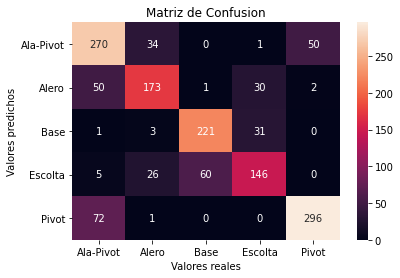

In [218]:
#Plot
sns.heatmap(cm, annot=True,fmt="d",
            xticklabels=['Ala-Pivot','Alero','Base','Escolta','Pivot'], 
            yticklabels=['Ala-Pivot','Alero','Base','Escolta',
                         'Pivot']).set(title='Matriz de Confusion', xlabel='Valores reales', ylabel='Valores predichos')

In [219]:
#Comprobamos el porcentaje de acierto
contador=0
for i in range(0,len(Resultado6)):
    if Resultado6.iloc[i,1]==Resultado6.iloc[i,0]:
          contador=contador+1   
    else:
        contador=contador 
proporcion=(contador/len(Resultado6))*100
print('El modelo tiene un acierto del:'+" "+ str(round(proporcion,2)))

El modelo tiene un acierto del: 75.08


###XGBoost

In [220]:
#Librerías necesarias
import xgboost as xgb
from sklearn.metrics import accuracy_score

#####Modelo Con Outliers

In [221]:
#Creamos un conjunto y guardando la columna de posicion
y = df['Pos']

#Creamos los conjuntos de datos
XtrainXGB, XtestXGB, ytrainXGB, ytestXGB = train_test_split(
    X, y, random_state=42, test_size=0.2)
# Construyo el modelo y ajusto los datos.
xgboost = xgb.XGBClassifier()
xgboost.fit(XtrainXGB, ytrainXGB)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [222]:
# Realizo las predicciones
y_pred = xgboost.predict(XtrainXGB)
y_pred = y_pred.astype(int)
predicciones = [round(value) for value in y_pred]
# Evalúo las predicciones
precision_train = accuracy_score(ytrainXGB, predicciones)

In [223]:
# Repito el proceso con datos de evaluacion
y_pred = xgboost.predict(XtestXGB)
y_pred = y_pred.astype(int)
predicciones = [round(value) for value in y_pred]

In [224]:
# Evalúo las predicciones
precision_test = accuracy_score(ytestXGB, predicciones)
print(xgboost)
print('Precisión xgboost train/test  {0:.3f}/{1:.3f}'
      .format(precision_train, precision_test))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
Precisión xgboost train/test  0.757/0.741


In [225]:
#Generamos el resultado
Resultado7 = pd.DataFrame({'Pos':ytestXGB , 'Pos_Predict': y_pred})

In [226]:
#Volvemos a renombrar los valores en ambas columnas
for i in range(0,len(Resultado7)):
    if Resultado7.iloc[i,0]==0:
          Resultado7.iloc[i,0]='Base'
    elif Resultado7.iloc[i,0]==1:
          Resultado7.iloc[i,0]='Escolta'
    elif Resultado7.iloc[i,0]==2:
          Resultado7.iloc[i,0]='Alero'
    elif Resultado7.iloc[i,0]==3:
          Resultado7.iloc[i,0]='Ala-Pivot'     
    else:
        Resultado7.iloc[i,0]='Pivot'

#Volvemos a renombrar los valores en ambas columnas
for i in range(0,len(Resultado7)):
    if Resultado7.iloc[i,1]==0:
          Resultado7.iloc[i,1]='Base'
    elif Resultado7.iloc[i,1]==1:
          Resultado7.iloc[i,1]='Escolta'
    elif Resultado7.iloc[i,1]==2:
          Resultado7.iloc[i,1]='Alero'
    elif Resultado7.iloc[i,1]==3:
          Resultado7.iloc[i,1]='Ala-Pivot'     
    else:
        Resultado7.iloc[i,1]='Pivot'


In [227]:
#Creamos la matriz de confusion
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Resultado7['Pos'],Resultado7['Pos_Predict'])

[Text(33.0, 0.5, 'Valores predichos'),
 Text(0.5, 15.0, 'Valores reales'),
 Text(0.5, 1.0, 'Matriz de Confusion')]

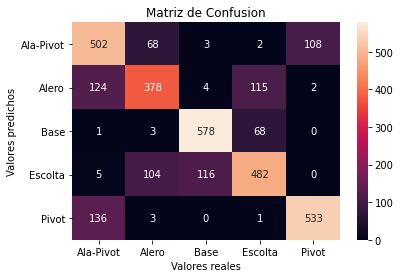

In [228]:
#Plot
sns.heatmap(cm, annot=True,fmt="d",
            xticklabels=['Ala-Pivot','Alero','Base','Escolta','Pivot'], 
            yticklabels=['Ala-Pivot','Alero','Base','Escolta',
                         'Pivot']).set(title='Matriz de Confusion', xlabel='Valores reales', ylabel='Valores predichos')

In [229]:
#Comprobamos el porcentaje de acierto
contador=0
for i in range(0,len(Resultado7)):
    if Resultado7.iloc[i,1]==Resultado7.iloc[i,0]:
          contador=contador+1   
    else:
        contador=contador 
proporcion=(contador/len(Resultado7))*100
print('El modelo tiene un acierto del:'+" "+ str(round(proporcion,2)))

El modelo tiene un acierto del: 74.13


#####Modelo Sin Outliers

In [230]:
#Creamos los conjuntos de datos
XtrainXGB2, XtestXGB2, ytrainXGB2, ytestXGB2 = train_test_split(
    Xsin, ysin, random_state=42, test_size=0.2)
# Construyo el modelo y ajusto los datos.
xgboost2 = xgb.XGBClassifier()
xgboost2.fit(XtrainXGB2, ytrainXGB2)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [231]:
# Realizo las predicciones
y_pred = xgboost2.predict(XtrainXGB2)
y_pred = y_pred.astype(int)
predicciones = [round(value) for value in y_pred]
# Evalúo las predicciones
precision_train = accuracy_score(ytrainXGB2, predicciones)

In [232]:
# Repito el proceso con datos de evaluacion
y_pred = xgboost2.predict(XtestXGB2)
y_pred = y_pred.astype(int)
predicciones = [round(value) for value in y_pred]

In [233]:
# Evalúo las predicciones
precision_test = accuracy_score(ytestXGB2, predicciones)
print(xgboost2)
print('Precisión xgboost train/test  {0:.3f}/{1:.3f}'
      .format(precision_train, precision_test))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
Precisión xgboost train/test  0.769/0.727


In [234]:
#Generamos el resultado
Resultado8 = pd.DataFrame({'Pos':ytestXGB2 , 'Pos_Predict': y_pred})

In [235]:
#Volvemos a renombrar los valores en ambas columnas
for i in range(0,len(Resultado8)):
    if Resultado8.iloc[i,0]==0:
          Resultado8.iloc[i,0]='Base'
    elif Resultado8.iloc[i,0]==1:
          Resultado8.iloc[i,0]='Escolta'
    elif Resultado8.iloc[i,0]==2:
          Resultado8.iloc[i,0]='Alero'
    elif Resultado8.iloc[i,0]==3:
          Resultado8.iloc[i,0]='Ala-Pivot'     
    else:
        Resultado8.iloc[i,0]='Pivot'

#Volvemos a renombrar los valores en ambas columnas
for i in range(0,len(Resultado8)):
    if Resultado8.iloc[i,1]==0:
          Resultado8.iloc[i,1]='Base'
    elif Resultado8.iloc[i,1]==1:
          Resultado8.iloc[i,1]='Escolta'
    elif Resultado8.iloc[i,1]==2:
          Resultado8.iloc[i,1]='Alero'
    elif Resultado8.iloc[i,1]==3:
          Resultado8.iloc[i,1]='Ala-Pivot'     
    else:
        Resultado8.iloc[i,1]='Pivot'

In [236]:
#Creamos la matriz de confusion
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Resultado8['Pos'],Resultado8['Pos_Predict'])

[Text(33.0, 0.5, 'Valores predichos'),
 Text(0.5, 15.0, 'Valores reales'),
 Text(0.5, 1.0, 'Matriz de Confusion')]

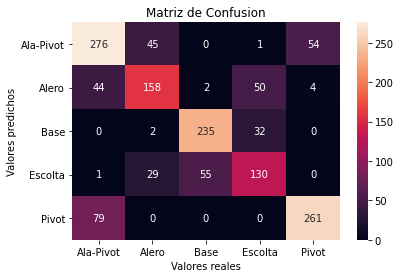

In [237]:
#Plot
sns.heatmap(cm, annot=True,fmt="d",
            xticklabels=['Ala-Pivot','Alero','Base','Escolta','Pivot'], 
            yticklabels=['Ala-Pivot','Alero','Base','Escolta',
                         'Pivot']).set(title='Matriz de Confusion', xlabel='Valores reales', ylabel='Valores predichos')

In [238]:
#Comprobamos el porcentaje de acierto
contador=0
for i in range(0,len(Resultado8)):
    if Resultado8.iloc[i,1]==Resultado8.iloc[i,0]:
          contador=contador+1   
    else:
        contador=contador 
proporcion=(contador/len(Resultado8))*100
print('El modelo tiene un acierto del:'+" "+ str(round(proporcion,2)))

El modelo tiene un acierto del: 72.7
